In [32]:
# import necessary libraries
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [33]:
# read data
in_dd=pd.read_csv('tn_stock_data_2018.csv')
# convert date from string to datetime type
in_dd.date=pd.to_datetime(in_dd.date,format='%d/%m/%y')

In [34]:
# show top observations from the data
in_dd.head()

,date,C_GR_RLC,company_code,company,ref_price,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,I
0,2018-01-02,11,725001,ADWYA,5.35,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,NaN
1,2018-01-02,11,340005,AMEN BANK,24.35,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,NaN
2,2018-01-02,11,730001,ARTES,6.27,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,NaN
3,2018-01-02,11,714001,ASSAD,9.00,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN,NaN
4,2018-01-02,11,360035,ATB,4.22,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90,NaN


In [35]:
# calculate daily return for every company
in_dd['currReturn']=100*in_dd.groupby(['company'])['close'].pct_change()

In [36]:
in_dd=in_dd.replace([np.inf, -np.inf], np.nan)

In [37]:
# make a pivot to create a data matrix where columns are companies and rows are days; the values in the data matrix are for the returns
ret_data=in_dd.pivot(index='date',columns='company',values='currReturn').dropna()

In [38]:
# show the top entries from the returns matrix
ret_data.head().round(2)

company,ADWYA,AETECH,AIR LIQUDE TSIE,ALKIMIA,AMEN BANK,AMI DA 1/4 110817,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,...,TELNET HOLDING,TPR,TUNINVEST-SICAR,TUNIS RE,TUNISAIR,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.74,3.92,0.00,0.00,-0.04,-13.82,-2.54,2.46,-3.03,-0.11,...,1.37,-2.30,0.00,-1.79,-2.33,0.41,0.0,0.41,1.91,-0.27
2018-01-04,3.74,3.77,-1.12,-3.00,-0.38,0.00,0.00,0.16,-4.50,1.11,...,2.69,-3.24,0.00,3.03,2.38,5.69,0.0,-0.45,-0.25,-2.97
2018-01-05,0.54,1.82,0.23,-4.49,0.33,0.00,0.00,0.00,-1.83,1.21,...,1.31,0.00,2.92,-1.29,-2.33,3.46,0.0,0.00,0.25,-0.14
2018-01-08,-1.43,3.57,0.00,-2.33,0.00,0.53,0.00,-2.56,5.87,1.63,...,0.97,2.43,0.00,-2.15,-2.38,-1.49,0.0,2.00,2.50,2.92
2018-01-09,0.00,0.00,0.00,0.00,-0.04,5.85,0.00,0.82,-2.39,1.50,...,-1.28,0.89,-4.48,-2.31,0.00,-2.64,0.0,-0.18,0.00,-0.95


In [39]:
ret_data.shape

(247, 84)

# Part 1 : Exploratory Data Analysis

Goal : use visualization techniques and correlation values on ret_data dataframe (daily stock returns) to explore if there are stocks that have relashionships on same day or in future days. 

Please add as many cells as necessary below to answer this question.

## 1.1 Understanding the distribution of the data

In [116]:
ret_data.describe()

company,ADWYA,AETECH,AIR LIQUDE TSIE,ALKIMIA,AMEN BANK,AMI DA 1/4 110817,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,...,TELNET HOLDING,TPR,TUNINVEST-SICAR,TUNIS RE,TUNISAIR,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,-0.046803,-0.124082,-0.004317,-0.010230,0.064731,380.154850,0.009566,0.020627,-0.151769,-0.062505,...,0.207361,0.133229,0.003399,-0.015068,0.268457,-0.068469,-0.021984,0.039273,0.032833,-0.008187
std,1.149649,2.254722,1.391540,1.476494,1.023608,2262.652164,2.299358,1.075320,2.534434,1.582153,...,1.655634,1.195447,1.723251,1.072123,2.339807,2.410720,1.314165,1.440541,1.438274,0.959704
min,-4.132231,-5.952381,-7.330643,-4.497878,-3.000000,-99.421965,-5.660377,-7.464789,-5.703422,-3.746398,...,-4.032258,-3.235294,-7.142857,-3.799020,-5.747126,-6.930693,-5.875952,-6.080000,-3.000000,-2.968961
25%,-0.678581,-1.670844,0.000000,0.000000,-0.362319,-2.300066,-2.030509,-0.363474,-2.080666,-1.052632,...,-0.910126,-0.434783,0.000000,-0.361882,-1.626124,-1.827876,0.000000,-0.661202,-0.602790,-0.144196
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.513305,1.526807,0.000000,0.000000,0.372451,1.906709,1.785714,0.477330,1.270434,0.737550,...,1.206907,0.597761,0.000000,0.244499,1.818182,1.332328,0.000000,0.744202,0.424191,0.000000
max,3.738318,5.479452,5.455680,6.079370,3.000000,16200.000000,5.769231,4.084507,6.081081,6.064516,...,5.970149,5.232558,6.000000,3.660131,6.000000,6.060606,4.500000,5.246721,4.389087,6.000000


#### We don't have missing data
#### Most companies present similar distribution of data 
#### the only company that present a different distribution is AMI DA 1/4 110817

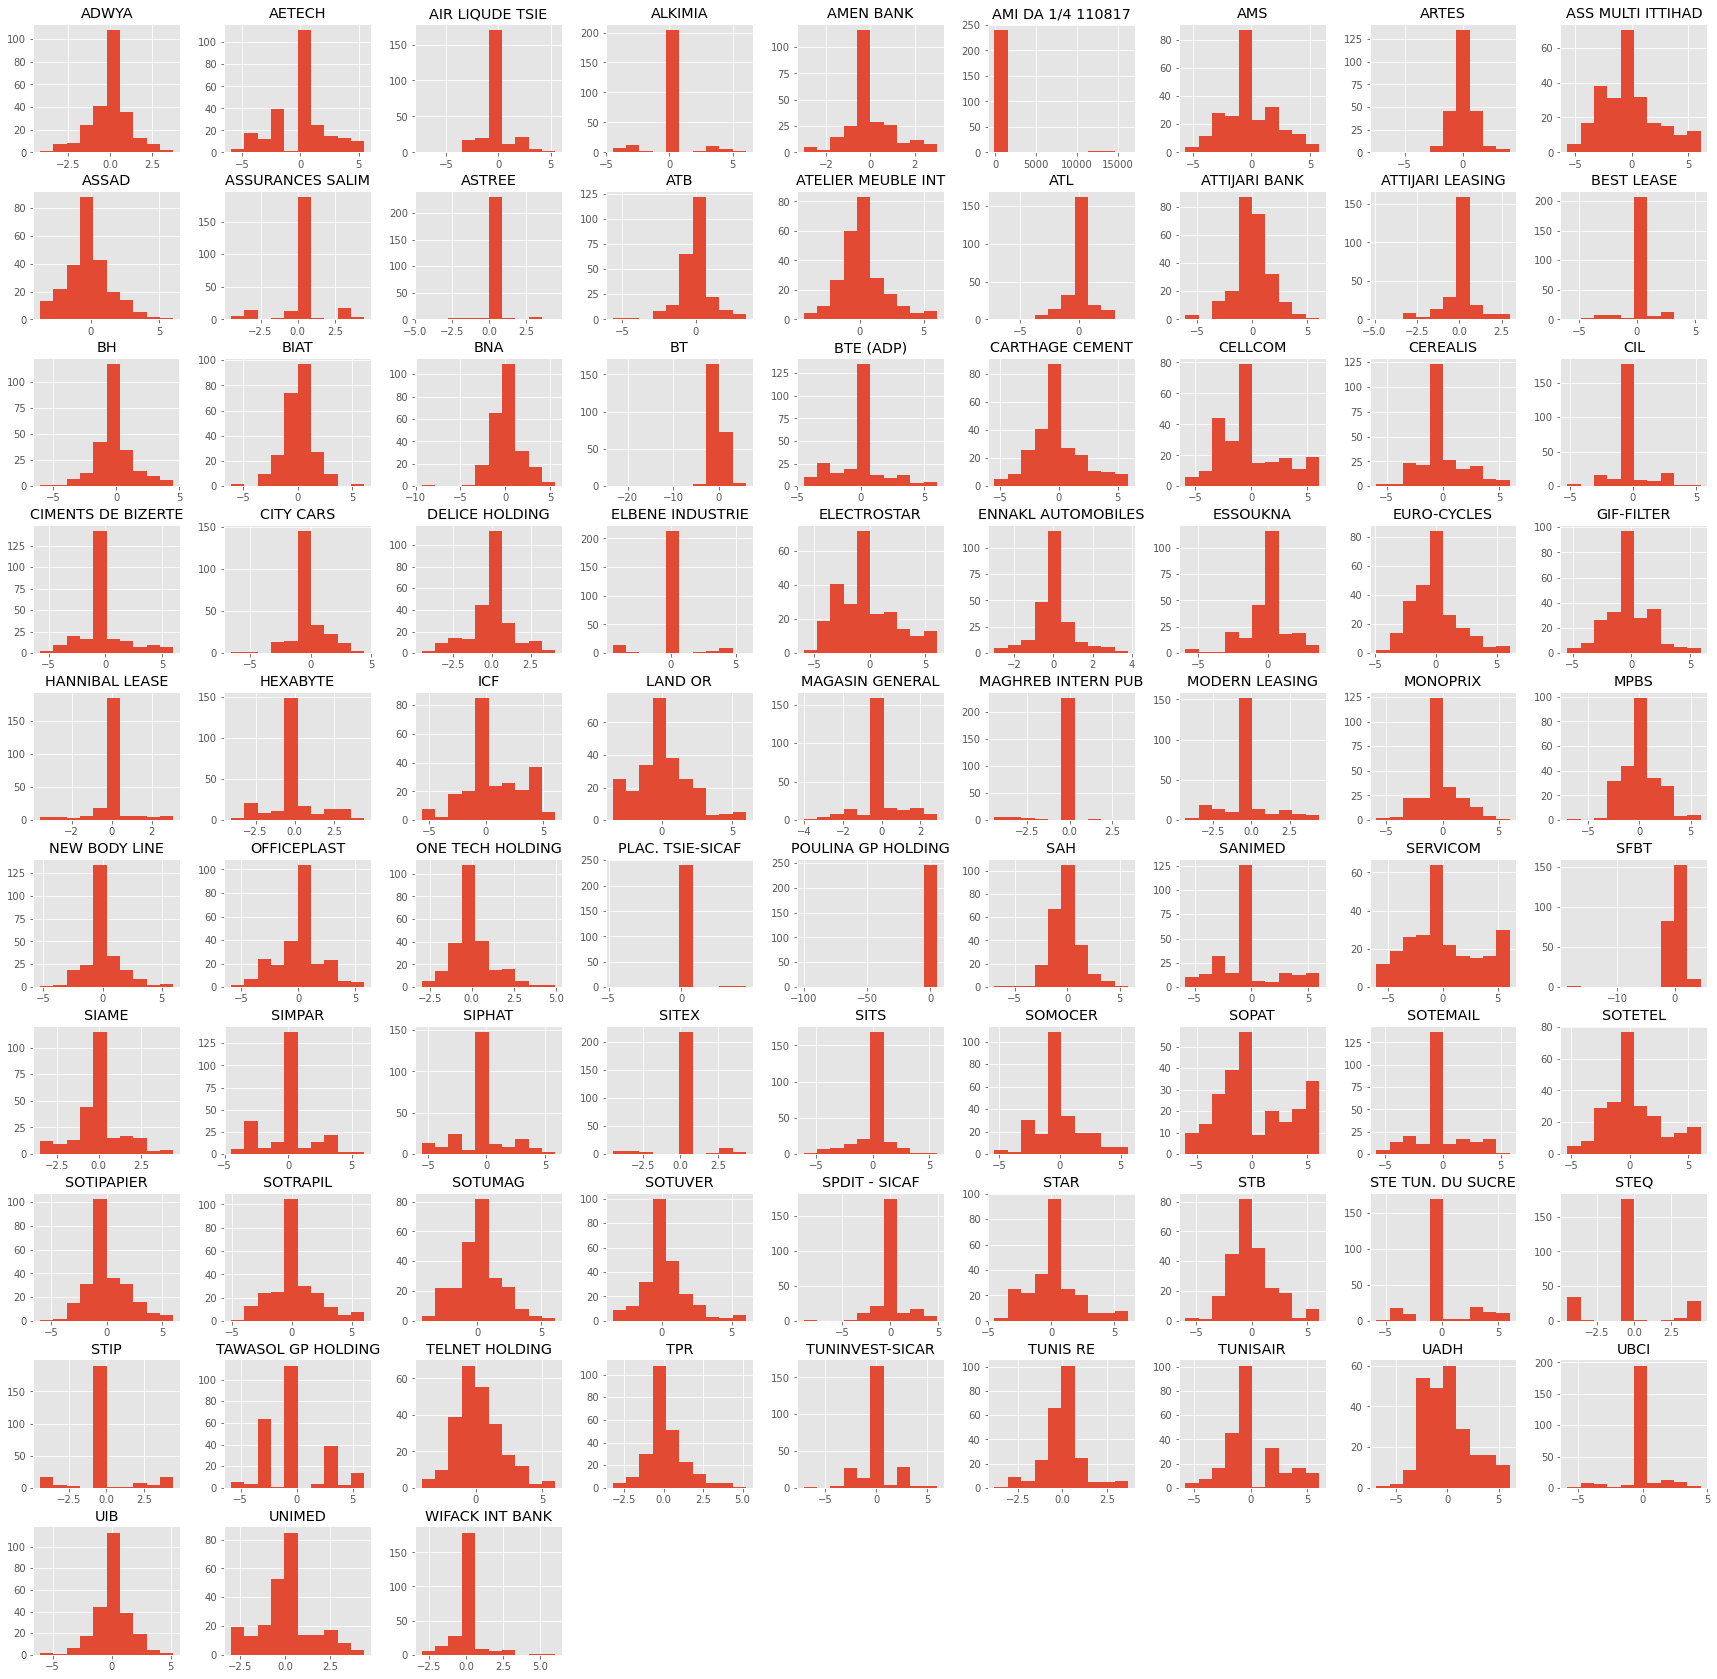

In [117]:
#looking at histograms for all companies
ret_data.hist(figsize=(30,30));

#### We can see that most returns don't exceed [-6,6] and centered around 0 only AMI has excessively high return values 

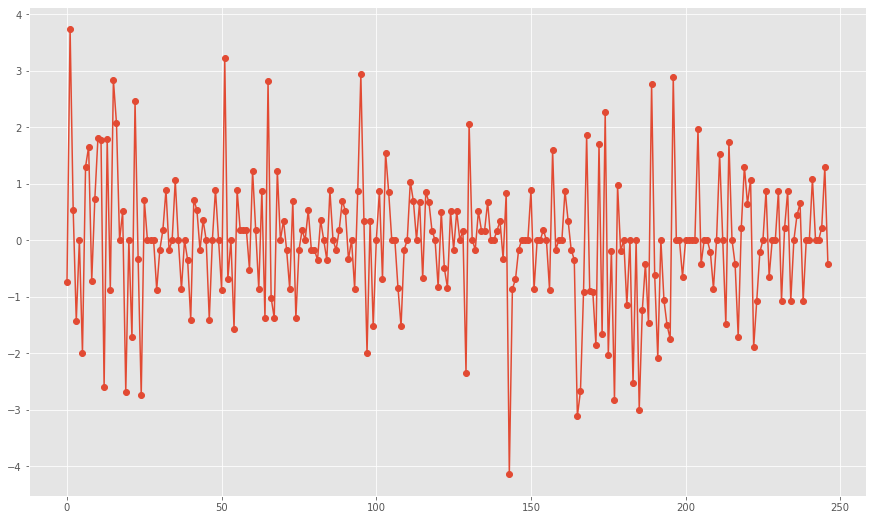

In [40]:
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(ret_data['ADWYA'] ))], ret_data['ADWYA'],'-o',label="ADWYA returns")

#### ADWYA returns : We can see that the return values fluctuate around 0 daily while staying relatively small

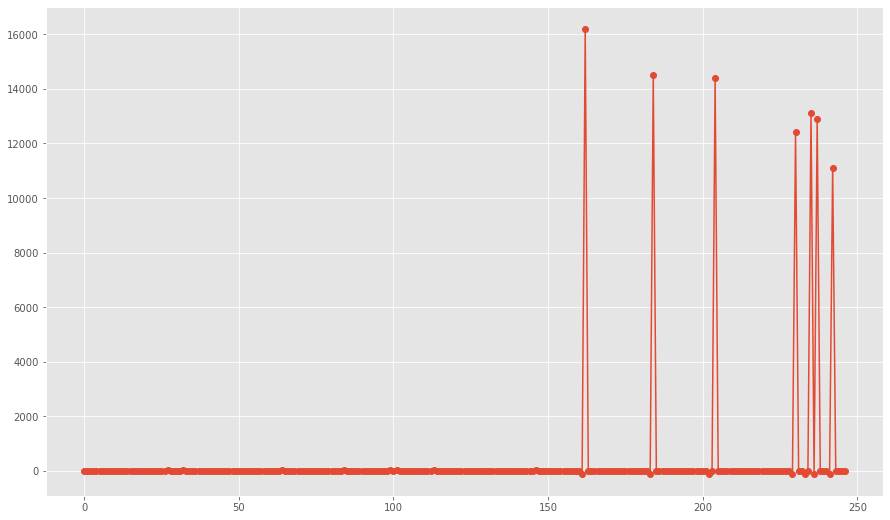

In [42]:
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(ret_data['AMI DA 1/4 110817'] ))], ret_data['AMI DA 1/4 110817'],'-o',label="AMI returns")

#### AMI returns : as seen in the histogram plot , AMI returns have very high values around 10000% 

## 1.2 Correlation between companies 

<AxesSubplot:xlabel='company', ylabel='company'>

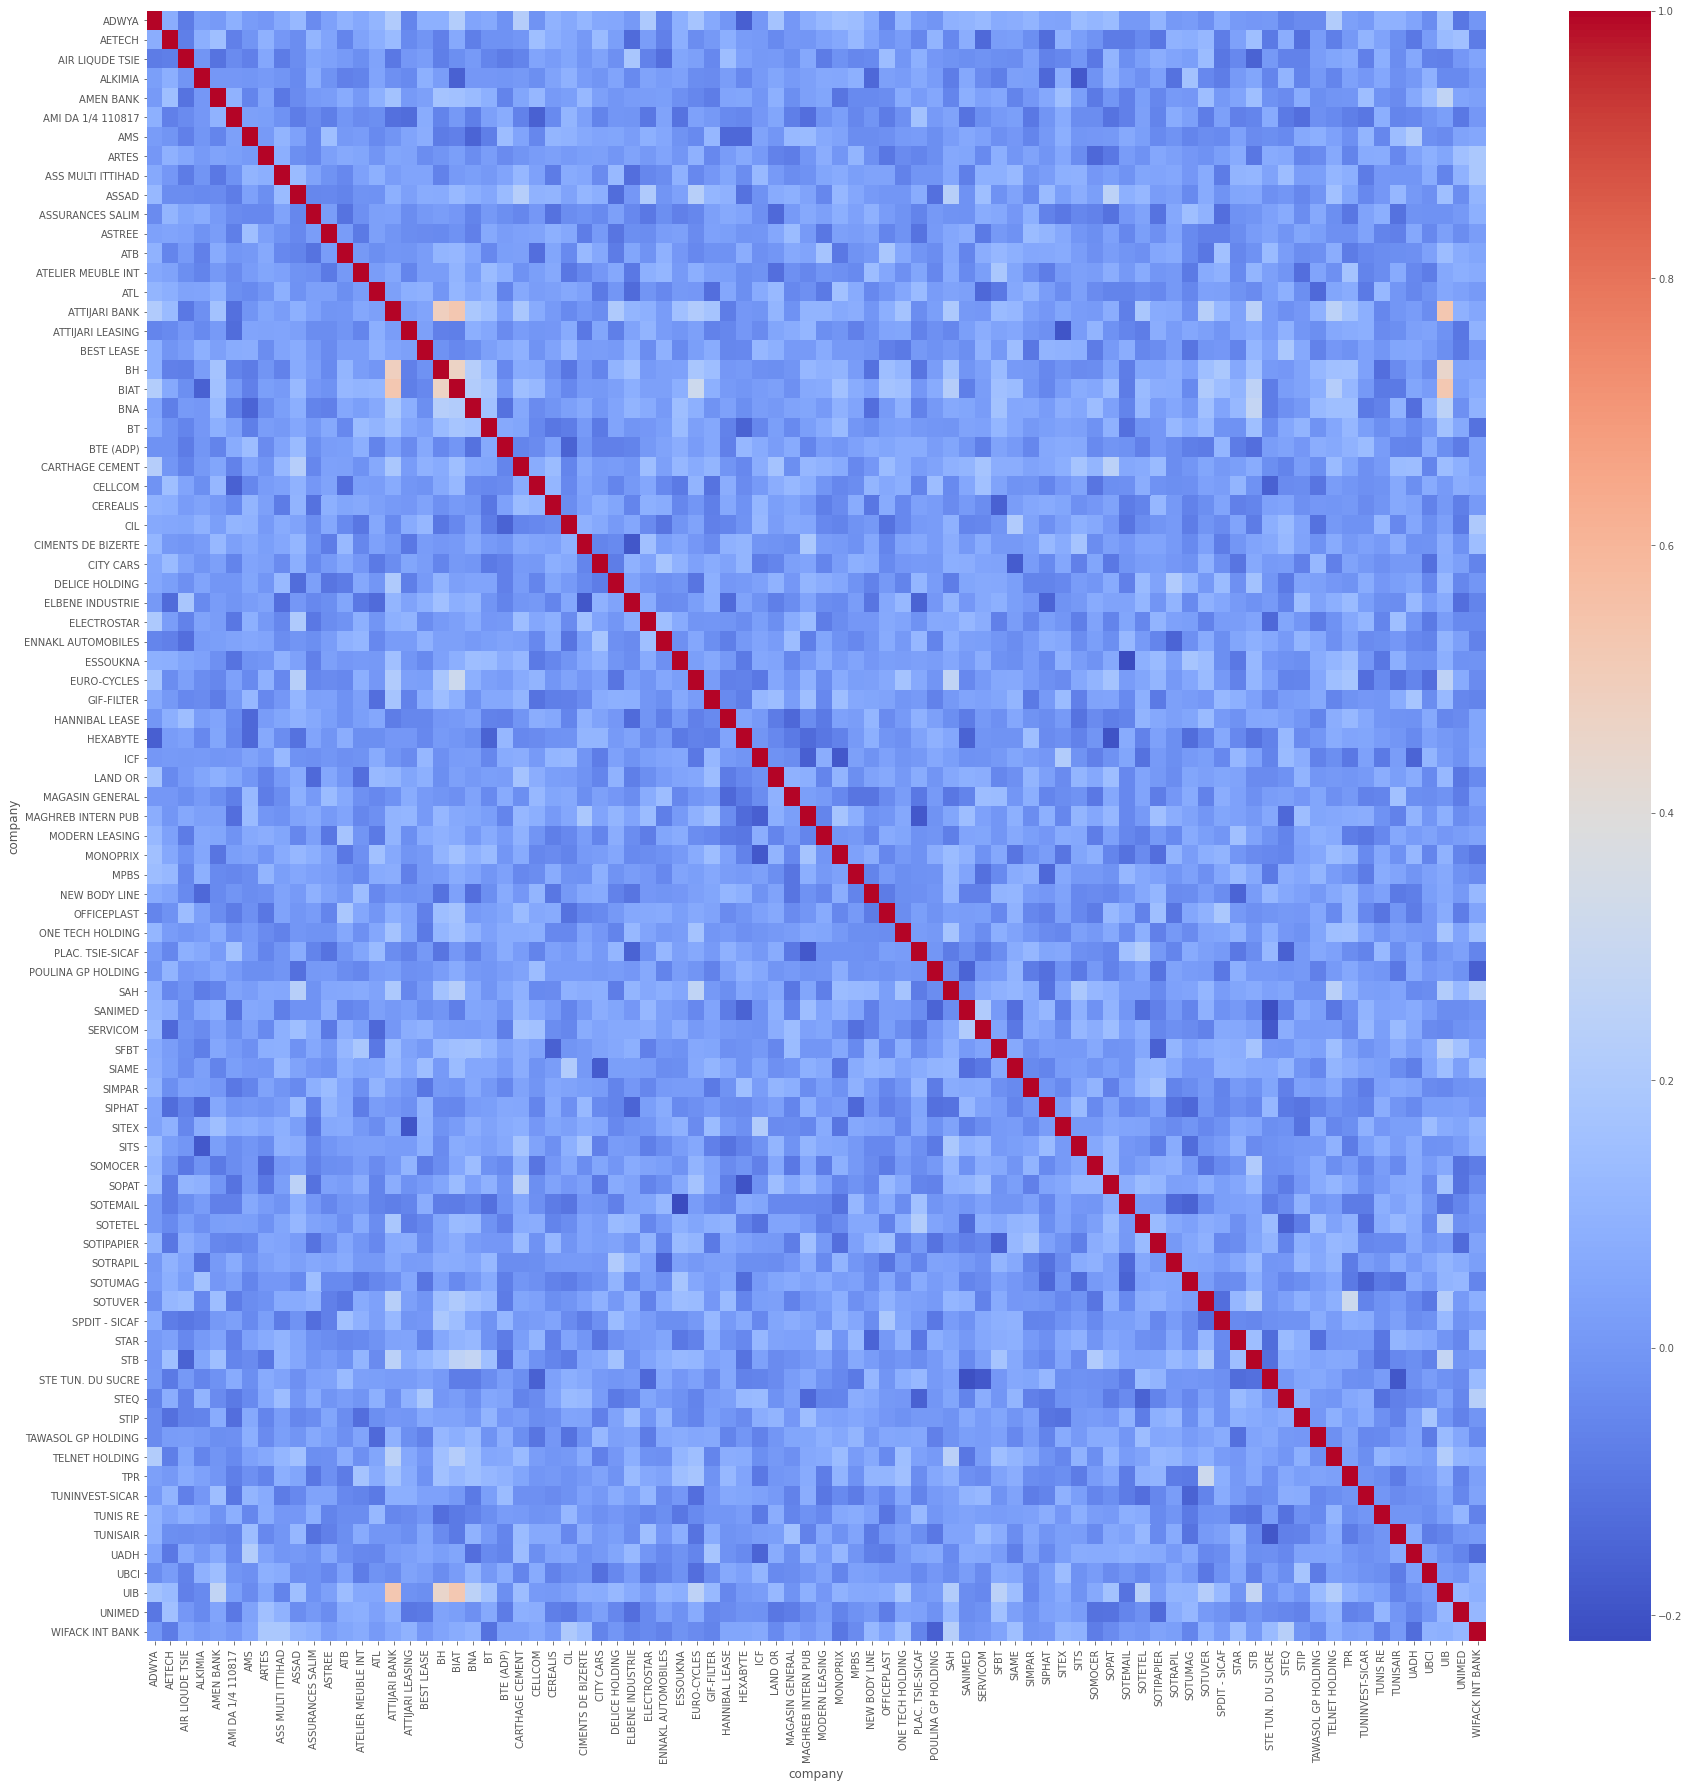

In [120]:
#Let's plot a heatmap of the data
corr = ret_data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,cmap='coolwarm')

#### Correlation between companies is very weak, all of the correlation values are relatively low. They don't exceed 0.6

### Let's check what companies show meaningful correlation

In [121]:
correlationMatix=ret_data.corr()

In [122]:
companies=set()
for i in correlationMatix.columns:
    for j in correlationMatix.index:
        if (correlationMatix[i][j]>0.3 or correlationMatix[i][j]<-0.3) and i!=j :
            print(i,' ',j,' ',correlationMatix[i][j])
            companies.add(i)
            companies.add(j)
companies

ATTIJARI BANK   BH   0.486701942861553
ATTIJARI BANK   BIAT   0.532763821029075
ATTIJARI BANK   UIB   0.5308594822871022
BH   ATTIJARI BANK   0.486701942861553
BH   BIAT   0.4705889128661452
BH   UIB   0.44767255902810227
BIAT   ATTIJARI BANK   0.532763821029075
BIAT   BH   0.4705889128661452
BIAT   EURO-CYCLES   0.31754338472705557
BIAT   UIB   0.5245672420202516
EURO-CYCLES   BIAT   0.31754338472705557
SOTUVER   TPR   0.3156873885107829
TPR   SOTUVER   0.3156873885107829
UIB   ATTIJARI BANK   0.5308594822871022
UIB   BH   0.44767255902810227
UIB   BIAT   0.5245672420202516


{'ATTIJARI BANK', 'BH', 'BIAT', 'EURO-CYCLES', 'SOTUVER', 'TPR', 'UIB'}

#### Only 7 companies ( ATTIJARI BANK, BH, BIAT, EURO-CYCLES, SOTUVER, TPR, UIB ) have correaltion values above 0.3 or below -0.3. Out of these companies 4 are banks. Banks show some meaningful correlation

<AxesSubplot:xlabel='company', ylabel='company'>

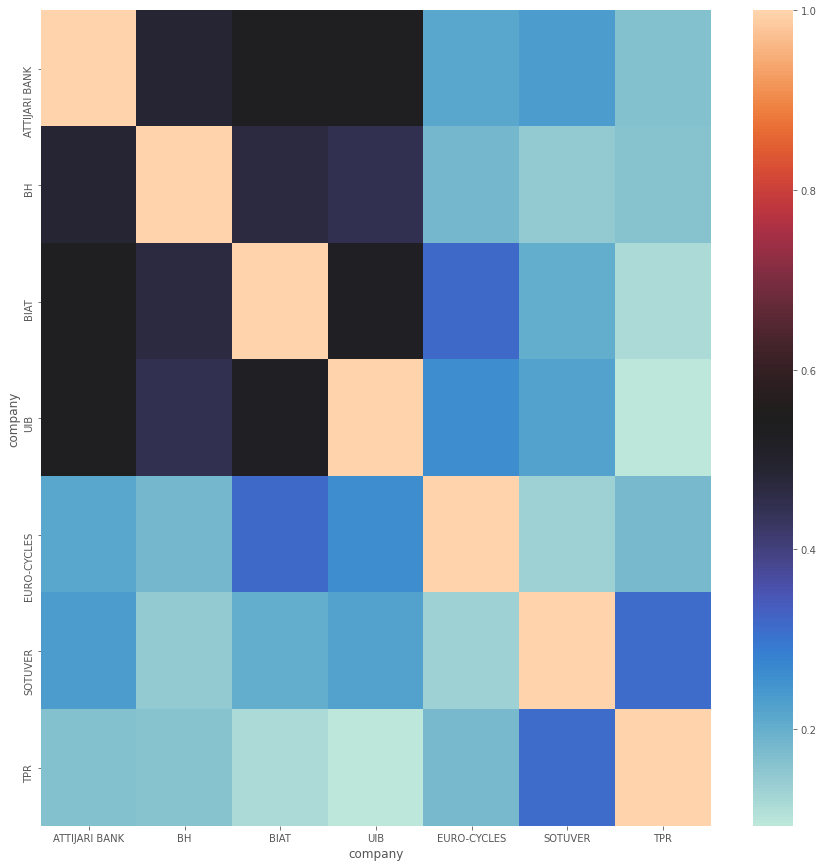

In [123]:
correlated=['ATTIJARI BANK','BH','BIAT','UIB','EURO-CYCLES','SOTUVER','TPR']
plt.figure(figsize=(15,15))
sns.heatmap(ret_data[correlated].corr(),cmap='icefire')

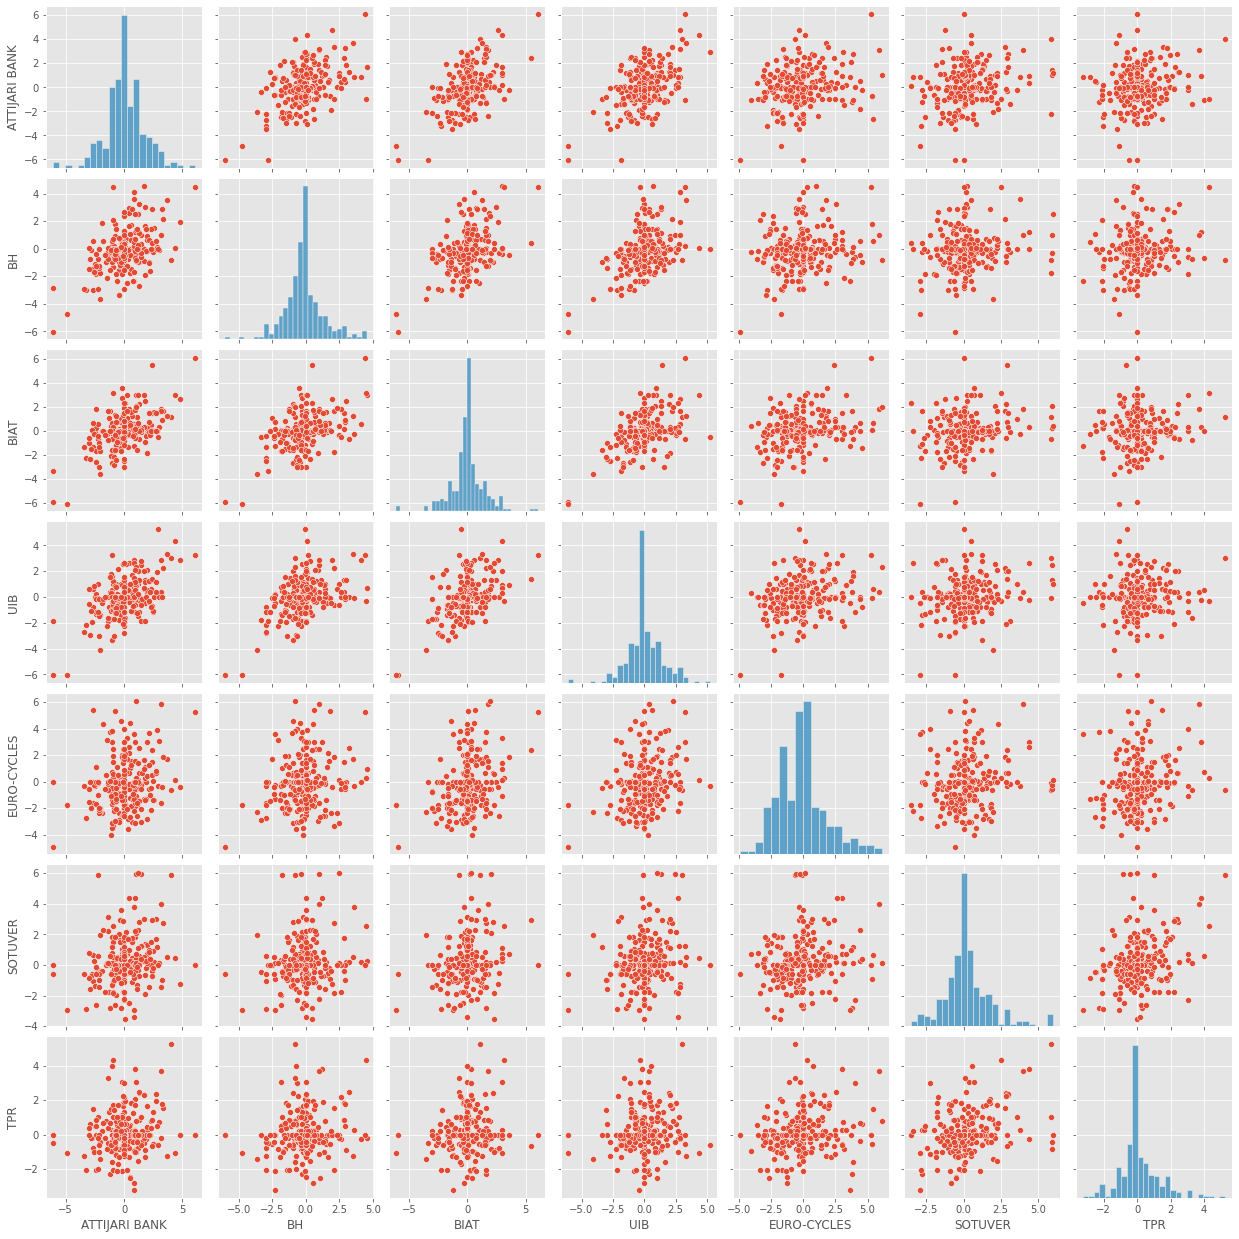

In [124]:
sns.pairplot(ret_data[correlated])

### Correlation between all banks 

<AxesSubplot:xlabel='company', ylabel='company'>

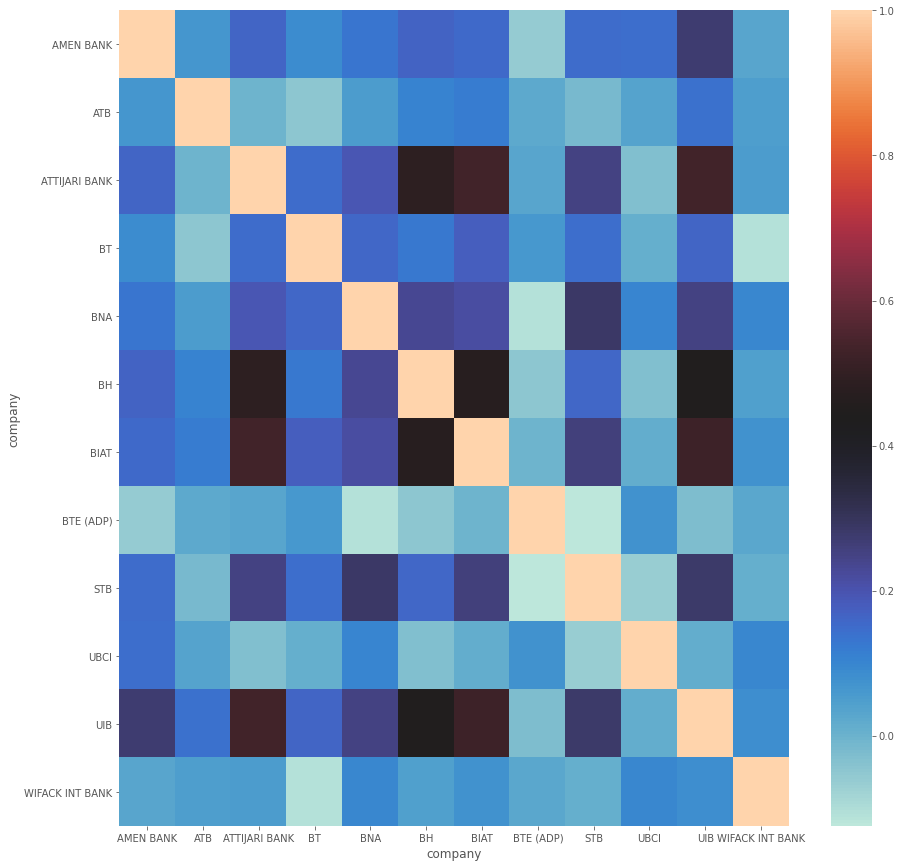

In [125]:
sector_bank=['AMEN BANK','ATB','ATTIJARI BANK','BT','BNA','BH','BIAT','BTE (ADP)','STB','UBCI','UIB','WIFACK INT BANK']
plt.figure(figsize=(15,15))
sns.heatmap(ret_data[sector_bank].corr(),cmap='icefire')

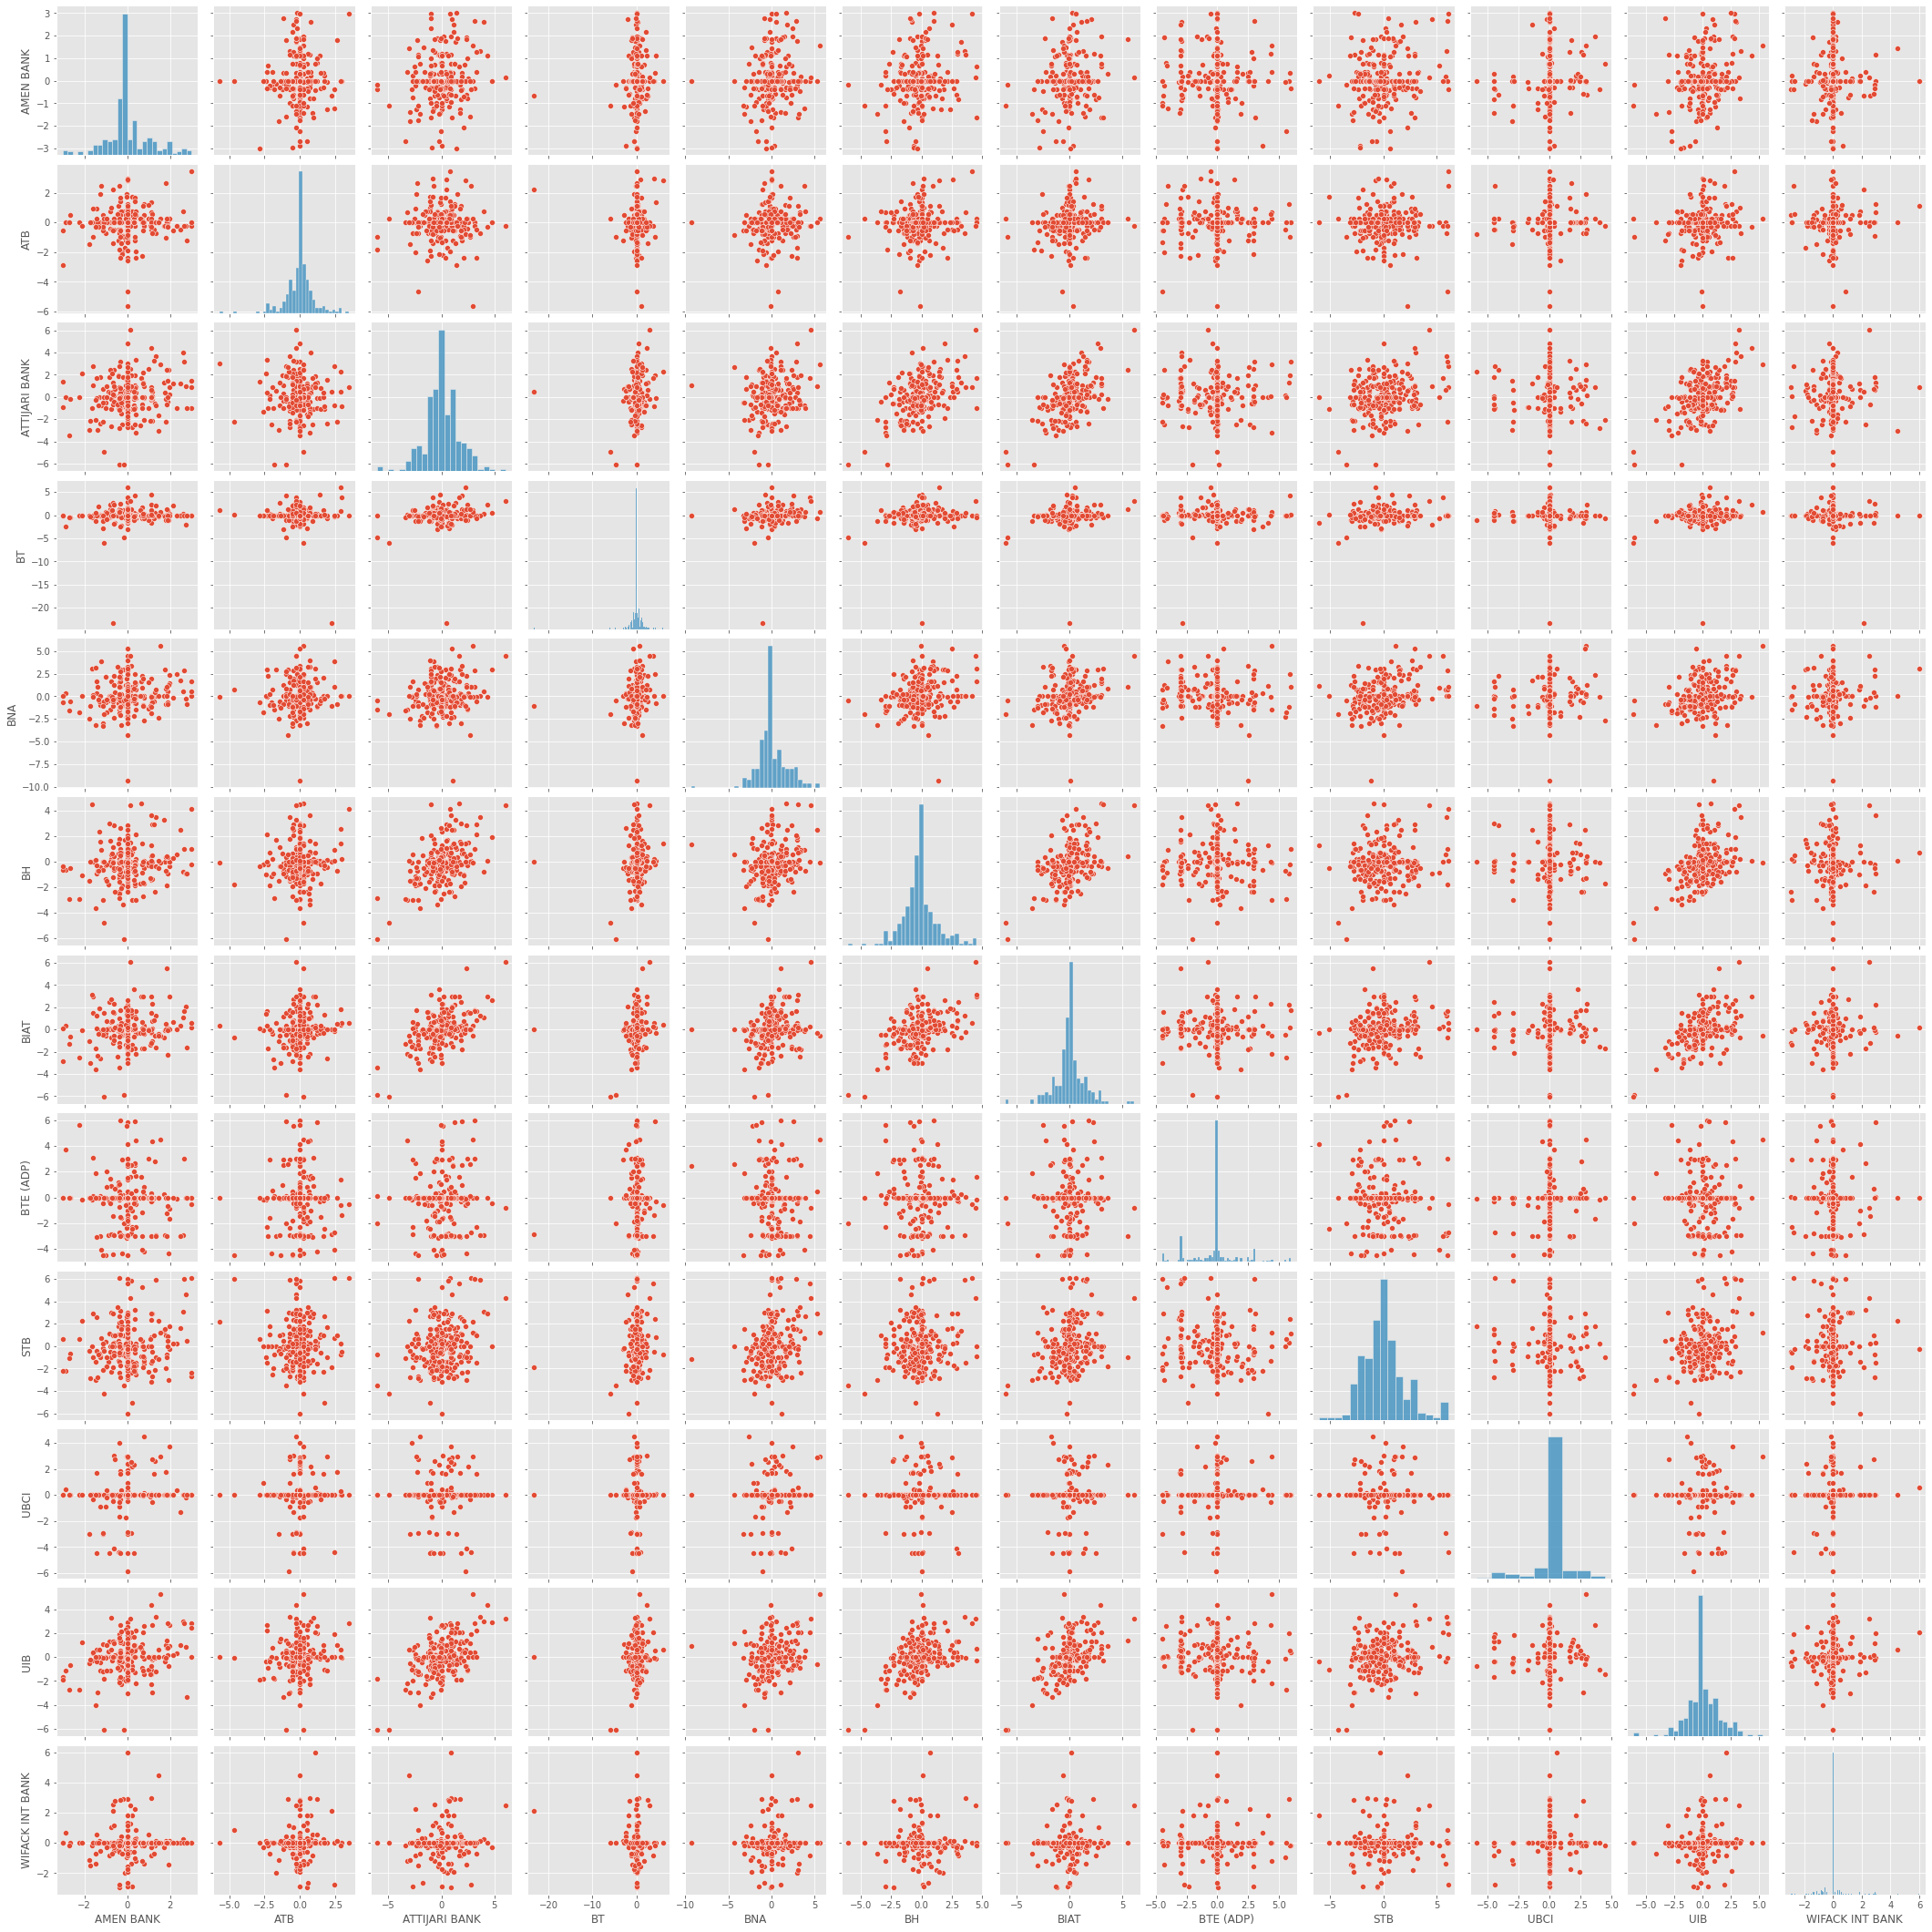

In [126]:
sns.pairplot(ret_data[sector_bank])

# Part 2 : Principal Component Analysis

Goal : perform the principal component analysis to understand what is driving the variance of the returns for the 84 stocks in the provided dataset. Please try to perform an analysis along the lines of the analysis we saw in class. It is important that you try to intrepret the results of the PCA. You may want to try running the analysis for various combinations of industries and analyze the results you get. You can find the industries for all the stocks in Tunisia Stock Exchange in https://www.ilboursa.com/marches/secteurs.aspx 

Please add as many cells as necessary below to answer this question.

In [56]:
from sklearn.decomposition import PCA

In [57]:
#function numPcaComponents gives us the number of components needed to explain variance with threshold 
def numPcaComponents(pca,limit):
    for i in range(0,len(pca.explained_variance_ratio_)):
        if np.cumsum(pca.explained_variance_ratio_)[i]>limit:
            return (i+1,np.cumsum(pca.explained_variance_ratio_)[i])


## 2.1 Scaling the return data : before starting our PCA analysis we need to scale our data

In [58]:
from sklearn.preprocessing import StandardScaler,normalize 
scaler = StandardScaler()
ret_data_normal=scaler.fit_transform(ret_data)
ret_data_normal=pd.DataFrame(ret_data_normal,columns=ret_data.columns,index=ret_data.index)

## 2.2 Applying PCA on our dataset 

In [59]:
pca=PCA().fit(ret_data_normal)
numComponents,percentage=numPcaComponents(pca,0.8)
print(np.round(percentage*100,decimals=2), '% of the variance is explained by ',numComponents, 'Principal components')


80.74 % of the variance is explained by  47 Principal components


In [60]:
pca_cum_sum=np.cumsum(pca.explained_variance_ratio_)
print ('{0:.2f}% of the variance is explained by the first PC'.format(pca_cum_sum[0]*100))

5.31% of the variance is explained by the first PC


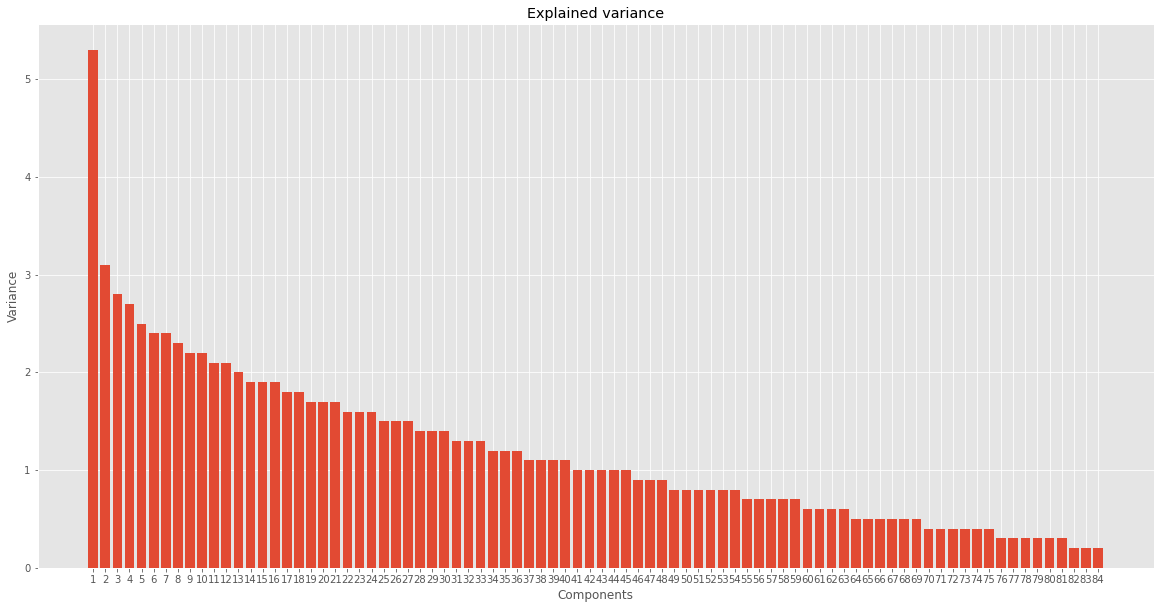

In [61]:
per_var=np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels=[i for i in range(1,len(per_var)+1)]
plt.figure(figsize=(20,10))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.title('Explained variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

#### While the first principal component explains 5.31% of the total variance we need 22 principal components to explain 50% of the variance , 47 PCs to explain 70% and 60 PCs to explain 90%.
#### This means that we can reduce the dimension of data to half while keeping 70% of the total information, yet the first two PCs won't be neary enough to explain the variance so plotting them won't be beneficial

In [62]:
pcaComponents=pd.DataFrame(columns=ret_data_normal.columns,index=["PC "+str(i) for i in range(1,85)],data = pca.components_).T
pcaComponents

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 75,PC 76,PC 77,PC 78,PC 79,PC 80,PC 81,PC 82,PC 83,PC 84
company,,,,,,,,,,,,,,,,,,,,,
ADWYA,-0.170280,-0.188662,0.089348,0.094339,-0.102480,0.132289,-0.007063,0.022727,-0.121109,0.029397,...,-0.104604,0.184157,-0.126202,-0.040056,-0.092533,0.047522,0.302684,-0.072906,0.003174,-0.105495
AETECH,-0.038426,0.135771,0.031044,-0.177982,-0.212785,0.143016,-0.170037,0.185070,-0.145318,-0.101478,...,0.007257,0.116125,0.000048,0.107054,0.004835,-0.001404,-0.097457,-0.166610,-0.042864,0.217854
AIR LIQUDE TSIE,0.029667,0.030192,-0.056971,0.159685,-0.113561,-0.205295,0.011176,-0.042684,0.047846,0.112762,...,0.038678,0.212483,0.062874,0.119773,-0.066270,-0.017536,-0.041058,0.008306,0.031914,-0.067710
ALKIMIA,0.025974,-0.009158,-0.014482,-0.083010,-0.138845,0.029230,-0.190618,-0.172528,-0.120324,0.011807,...,0.061668,-0.060331,0.016002,0.191524,-0.091395,0.029690,0.027413,-0.144746,0.099780,-0.040903
AMEN BANK,-0.102727,0.082017,0.033119,-0.171023,-0.008730,0.127576,-0.025858,0.120963,-0.128304,0.281699,...,-0.158029,0.021168,0.067086,0.035015,-0.023886,0.010680,0.038885,-0.035218,-0.015754,0.002791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UADH,-0.023134,-0.196249,-0.100730,0.004169,-0.076584,0.041171,0.123790,-0.092902,-0.041983,-0.021746,...,0.069913,-0.000445,-0.112434,0.018087,-0.078666,0.081914,0.116191,-0.040067,0.046663,0.235626
UBCI,0.010697,0.076622,0.119241,-0.132838,0.001114,0.023900,0.082743,-0.130325,-0.010435,0.152539,...,0.006086,0.062007,0.015760,-0.006243,0.136511,-0.094029,-0.081545,0.183255,-0.072785,0.007314
UIB,-0.336748,0.128047,-0.025292,0.006922,0.052424,0.121648,0.020730,0.044788,-0.095548,0.034431,...,0.151892,-0.220461,-0.016743,-0.167094,0.172177,0.308009,-0.069690,-0.248859,0.075980,-0.150374


In [63]:
PC1=pd.DataFrame(abs(pcaComponents.sort_values(by='PC 1',ascending=True)["PC 1"])).head(10)
PC1

,PC 1
company,
UIB,0.336748
BIAT,0.333537
ATTIJARI BANK,0.331550
BH,0.272777
BNA,0.199076
STB,0.194885
EURO-CYCLES,0.193406
TELNET HOLDING,0.189965
SAH,0.187090


#### We can see that the first factor that explains 5.31%of the total variance is determined mainely by banks ( UIB , BIAT , ATTIJARI BANK , BH , BNA , STB ) which might indicate that banks drive the return of the market

## 2.3 PCA on banks only

In [64]:
sector_bank=['AMEN BANK','ATTIJARI BANK','BH','BIAT','UIB']
banks=ret_data_normal[sector_bank]
pcaBank=PCA().fit(banks)
np.cumsum(pcaBank.explained_variance_ratio_)


array([0.51787138, 0.70370935, 0.81641239, 0.90996845, 1.        ])

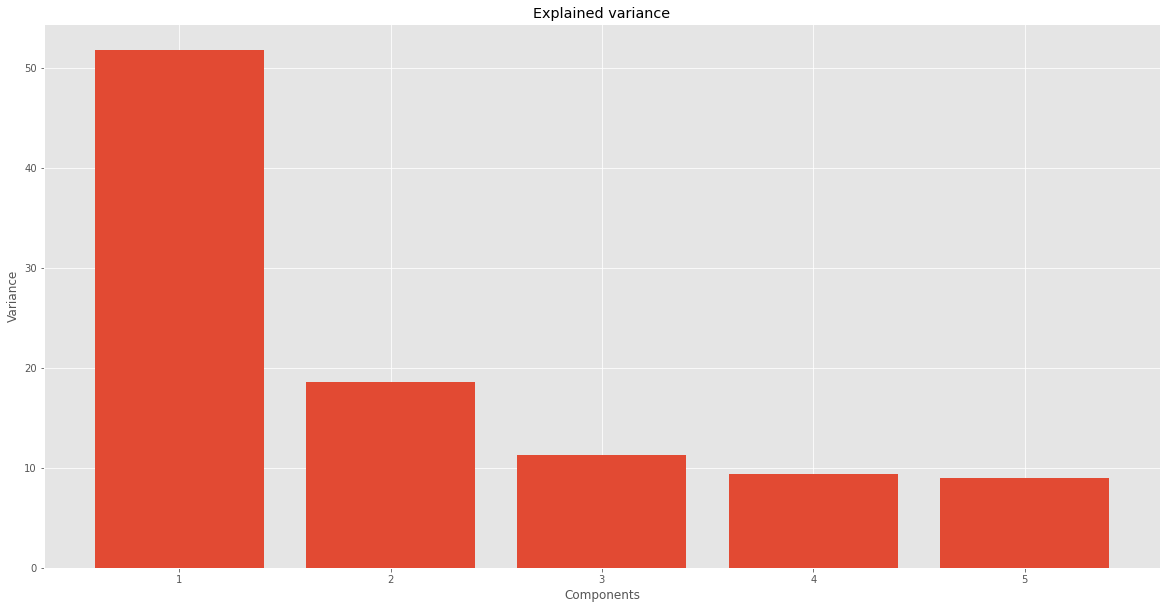

In [65]:
np.cumsum(pcaBank.explained_variance_ratio_)
per_var=np.round(pcaBank.explained_variance_ratio_* 100,decimals=1)
labels=[i for i in range(1,len(per_var)+1)]
plt.figure(figsize=(20,10))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.title('Explained variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

#### To explain the total variance in banks we only need 5 principal components. The first and second factors can together explain 70.37% of the total variance.
### We can plot the first and second factors to see how they summarize the data

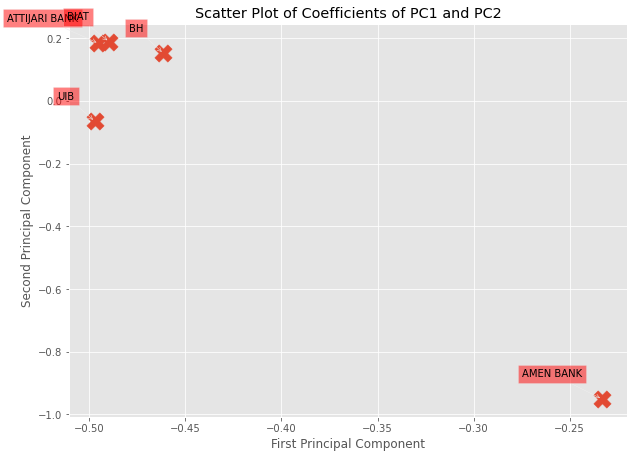

In [66]:
pcaBank=PCA(n_components=2).fit(banks)
factor_exposures = pd.DataFrame(index=["PC1", "PC2"],columns=banks.columns,data = pcaBank.components_).T

labels = factor_exposures.index
data = factor_exposures.values
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(data[:, 0], data[:, 1], marker='X', s=300)
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(fc='red', alpha=0.5),arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'));

## 2.4 PCA on banks and Pharmaceuticals combined  

In [67]:
sector_bank_pharma=['AMEN BANK','ATTIJARI BANK','BH','BIAT','UIB','ADWYA','SIPHAT','UNIMED']
retBankPharma=ret_data_normal[sector_bank_pharma]
pcaBankPharma=PCA().fit(ret_data_normal[sector_bank_pharma])

In [68]:
np.cumsum(pcaBankPharma.explained_variance_ratio_)

array([0.33339544, 0.47421226, 0.60495273, 0.71996444, 0.81955918,
       0.88690803, 0.9443123 , 1.        ])

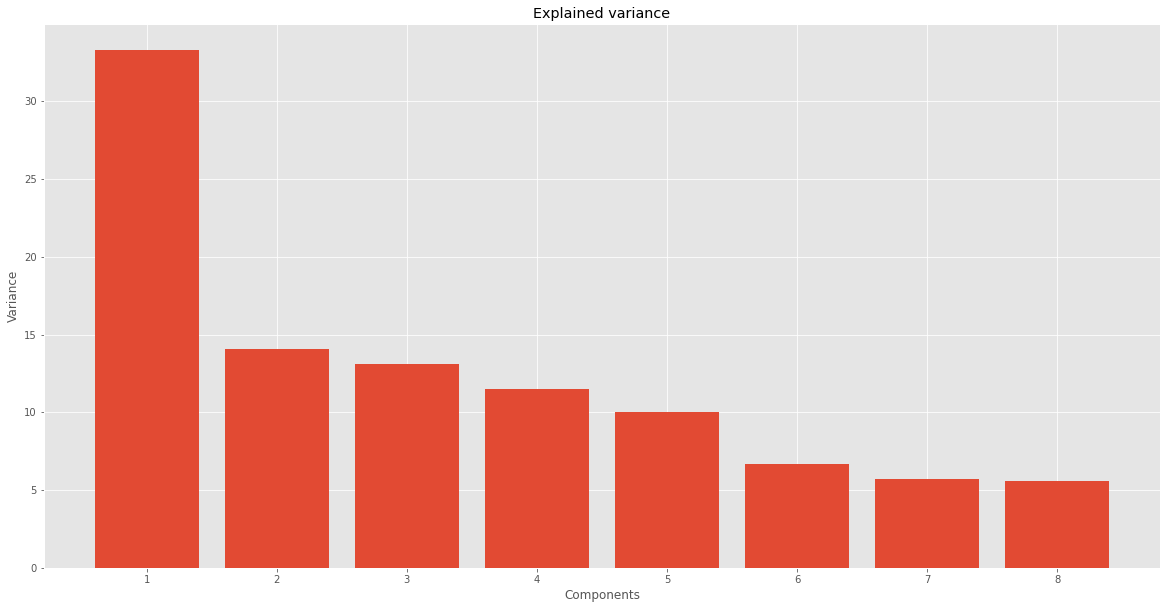

In [69]:
per_var=np.round(pcaBankPharma.explained_variance_ratio_* 100,decimals=1)
labels=[i for i in range(1,len(per_var)+1)]
plt.figure(figsize=(20,10))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.title('Explained variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

#### To explain the total variance in banks we need 8 principal components. The first and second factors can together explain 47.4% of the total variance.
### Let's examine the components we got and plot the first two components 

In [70]:
factor_exposures_bank = pd.DataFrame(index=["factor "+str(i) for i in range(1,9)],columns=retBankPharma.columns,data = pcaBankPharma.components_).T
factor_exposures_bank

,factor 1,factor 2,factor 3,factor 4,factor 5,factor 6,factor 7,factor 8
company,,,,,,,,
AMEN BANK,-0.221290,0.357392,0.236216,-0.743581,0.419729,-0.099473,0.012611,-0.168417
ATTIJARI BANK,-0.489285,-0.028162,-0.030802,0.147591,-0.099691,0.096530,-0.704957,-0.469952
BH,-0.444589,0.002191,-0.174992,-0.046006,-0.333053,-0.780321,0.122412,0.186513
BIAT,-0.482839,-0.127000,-0.081106,0.063310,-0.087460,0.338579,0.679336,-0.395436
UIB,-0.487639,0.105802,0.030264,-0.023791,-0.002773,0.434423,-0.106362,0.741275
ADWYA,-0.193771,-0.551888,0.399780,0.271829,0.602866,-0.230389,0.022997,0.084278
SIPHAT,0.003068,0.250845,0.853025,0.168875,-0.416985,-0.023312,0.069153,-0.041166
UNIMED,-0.074095,0.690395,-0.132898,0.562320,0.397473,-0.122082,0.098850,-0.036593


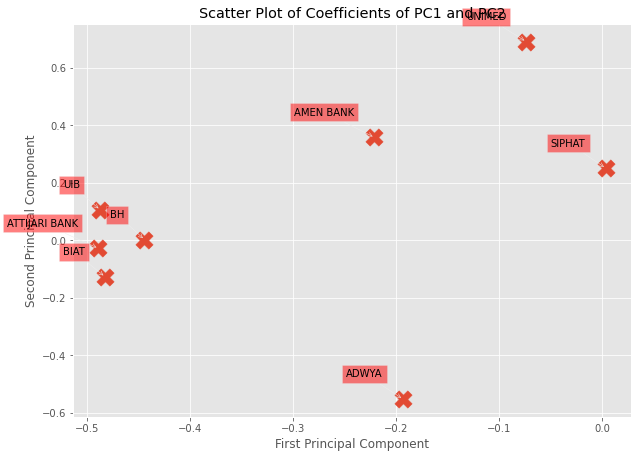

In [71]:
labels = factor_exposures_bank.index
data = factor_exposures_bank.values
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(data[:, 0], data[:, 1], marker='X', s=300)
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(fc='red', alpha=0.5),arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'));

#### We can see that component 1 clearly distinguishes between banks and pharmaceuticals ( banks on the left and pharma on the right), it takes high negative values for banks and small values for pharma. For the second component it doesn't separate the two sectors that well ( banks in the middle and pharma is on top and bottom. the rest of the components are a combination of other variables that indicate another aspect of the data

## 2.5 PCA on banks and Telecom companies combined  

In [72]:
sector_bank_telecom=['AMEN BANK','ATTIJARI BANK','BH','BIAT','UIB','SERVICOM','SOTETEL']
retBankTelecom=ret_data_normal[sector_bank_telecom]
pcaBankTelecom=PCA().fit(retBankTelecom)
np.cumsum(pcaBankTelecom.explained_variance_ratio_)

array([0.37796101, 0.52917388, 0.66725652, 0.79612052, 0.8719984 ,
       0.93763352, 1.        ])

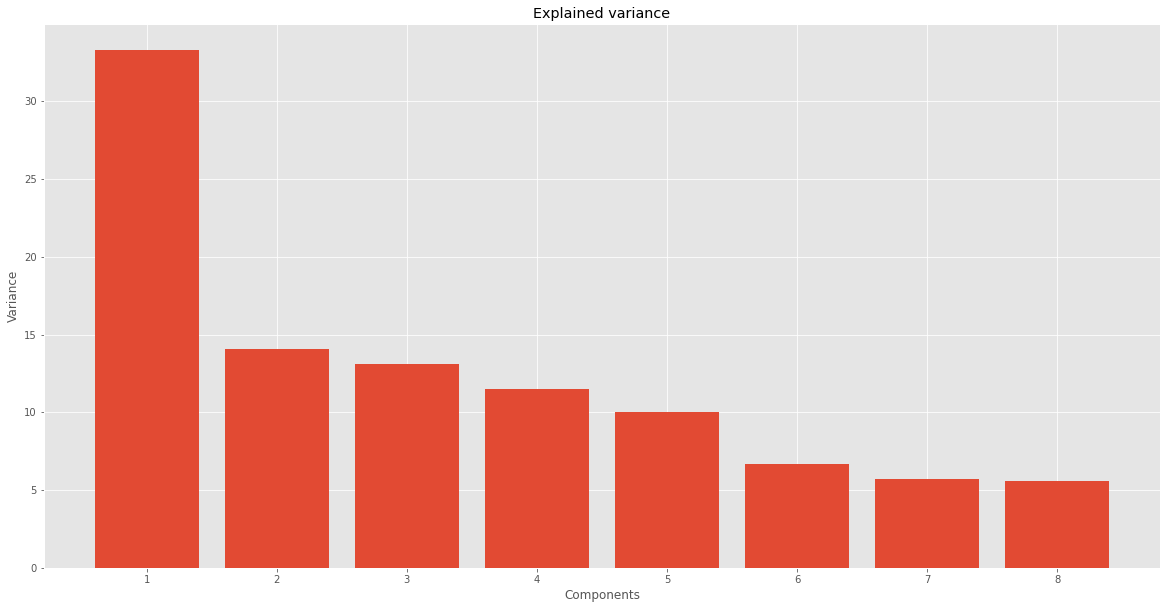

In [73]:
per_var=np.round(pcaBankPharma.explained_variance_ratio_* 100,decimals=1)
labels=[i for i in range(1,len(per_var)+1)]
plt.figure(figsize=(20,10))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.title('Explained variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

#### To explain the total variance in banks we need 8 principal components. The first and second factors can together explain 52.9% of the total variance.
### Let's examine the components we got and plot the first two components 

In [74]:
pcaBankTelecom=PCA(n_components=4).fit(retBankTelecom)
factor_exposures_telecom = pd.DataFrame(index=["factor 1", "factor 2","factor 3","factor 4"],columns=retBankTelecom.columns,data = pcaBankTelecom.components_).T
factor_exposures_telecom

,factor 1,factor 2,factor 3,factor 4
company,,,,
AMEN BANK,-0.225162,-0.038630,-0.677040,-0.667475
ATTIJARI BANK,-0.490324,-0.020961,0.112175,0.137486
BH,-0.445835,-0.133786,-0.109241,0.316810
BIAT,-0.480438,-0.054033,0.044584,0.210205
UIB,-0.495742,-0.037121,0.066755,-0.164451
SERVICOM,-0.014308,0.774710,-0.469509,0.393647
SOTETEL,-0.182562,0.612940,0.538719,-0.457185


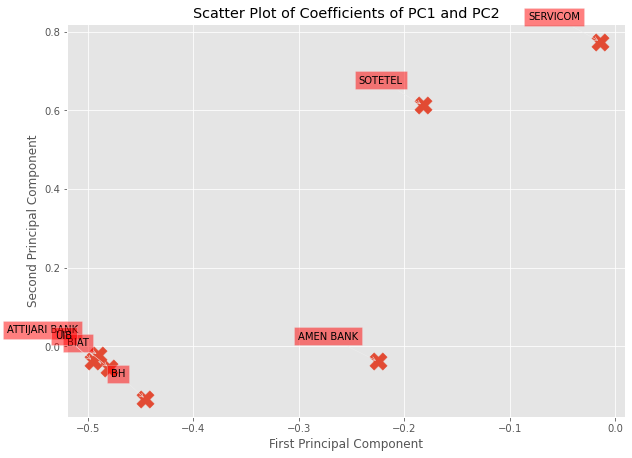

In [75]:
labels = factor_exposures_telecom.index
data = factor_exposures_telecom.values
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(data[:, 0], data[:, 1], marker='X', s=300)
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):plt.annotate(label,xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(fc='red', alpha=0.5),arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'));

#### This time PCA can distinguish clearly the difference bettween banks and telecom companies :  banks on the bottom left side and telecom on the top right side. We can also see that the defining component is the second PC that seprates the two sectors clearly : banks get very low values while telecom get high values

# Part 3 : Factor Analysis

Goal : perform the factor analysis on the returns for the 84 stocks in the provided dataset. It is important that you try to interpret the results of the FA. You may want to try running the analysis for various combinations of industries and analyze the results you get. You can find the industries for all the stocks in Tunisia Stock Exchange in https://www.ilboursa.com/marches/secteurs.aspx

You will need to install factor-analyzer (https://pypi.org/project/factor-analyzer/) to perform the factor analysis exercise. You can find a variety of examples in the documentation of the package : https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

You may want to take a look at the following link regarding how to choose the factor in the FA: https://www.theanalysisfactor.com/factor-analysis-how-many-factors/

Please add as many cells as necessary below to answer this question.

In [76]:
from factor_analyzer import FactorAnalyzer

## 3.1 Creating a factor analyzer and fitting the data

In [77]:
fa = FactorAnalyzer(84,rotation='Varimax')
fa.fit(ret_data)

FactorAnalyzer(n_factors=84, rotation='varimax', rotation_kwargs={})

### Plotting a scree plot to determine how many factors are meaningful

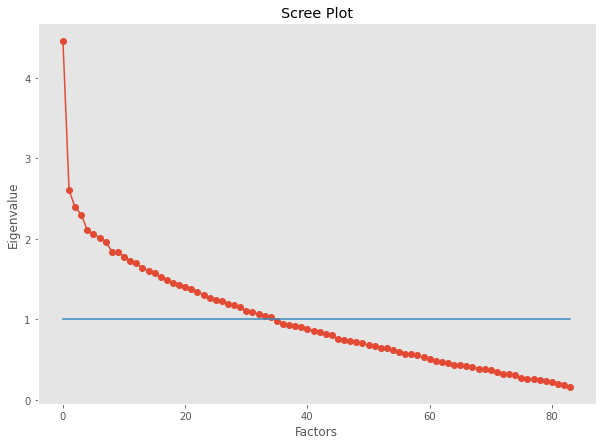

In [78]:
eigenValue,v=fa.get_eigenvalues()
plt.figure(figsize=(10,7))
plt.plot(range(ret_data.shape[1]),eigenValue,'-o')
plt.plot(range(ret_data.shape[1]),[1 for i in range (ret_data.shape[1])]) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### We can see that we have 35 signficant factors ( the first 35 factors have  an eigenValue greater than 1 ). But we also need to check the total variance explained by these factors

In [79]:
fa = FactorAnalyzer(35)
fa.fit(ret_data)

FactorAnalyzer(n_factors=35, rotation_kwargs={})

In [80]:
pd.DataFrame(index=['SS Loadings','Proportion Var','Cumulative Var'],columns=["F "+str(i) for i in range(1,36)],data=fa.get_factor_variance())

,F 1,F 2,F 3,F 4,F 5,F 6,F 7,F 8,F 9,F 10,...,F 26,F 27,F 28,F 29,F 30,F 31,F 32,F 33,F 34,F 35
SS Loadings,4.625351,3.184233,3.005587,2.944964,2.887360,2.816525,2.704573,2.645403,2.607893,2.557795,...,1.915403,1.816201,1.799911,1.785891,1.710789,1.705927,1.669499,1.635796,1.585177,1.337317
Proportion Var,0.055064,0.037908,0.035781,0.035059,0.034373,0.033530,0.032197,0.031493,0.031046,0.030450,...,0.022802,0.021621,0.021428,0.021261,0.020367,0.020309,0.019875,0.019474,0.018871,0.015920
Cumulative Var,0.055064,0.092971,0.128752,0.163811,0.198184,0.231715,0.263912,0.295405,0.326451,0.356901,...,0.759802,0.781424,0.802851,0.824112,0.844479,0.864787,0.884662,0.904136,0.923007,0.938928


#### The 35 factors can explain 93.89% of the total variance 
## 3.2 Interpreting the first factors 
### Let's see the companies that drive the first and second factors and try to intrepret their meaning ( difference between PCA and Common Factor Analysis is that the factor in the latter can be given a meaning )

In [81]:
loadings=pd.DataFrame(index=ret_data.columns,columns=["Factor "+str(i) for i in range(1,36)],data=fa.loadings_)
#Getting the 6 biggest factor 1 loadings 
F1=loadings.sort_values(by='Factor 1',ascending=False).head(6)['Factor 1']
#Getting the 6 biggest factor 2 loadings 
F2=loadings.sort_values(by='Factor 2',ascending=False).head(6)['Factor 2']
dic={'Factor 1':F1.index,'Factor 2':F2.index}
pd.DataFrame(dic)

,Factor 1,Factor 2
0,ATTIJARI BANK,CIMENTS DE BIZERTE
1,BH,MAGHREB INTERN PUB
2,BIAT,ELECTROSTAR
3,UIB,SITS
4,EURO-CYCLES,HEXABYTE
5,AMEN BANK,ATB


#### We notice that banks are dominant in the first factor as they have the highest loading. This can indicated that the first factor is grouping companies related to the banking sector 
#### The second factor is determined by a combination of companies ( CIMENTS DE BIZERTE , MAGHREB INTERN PUB, ELECTROSTAR) it's harder to determine the underlying meaning of this factor 

## 3.3 Application on banks 

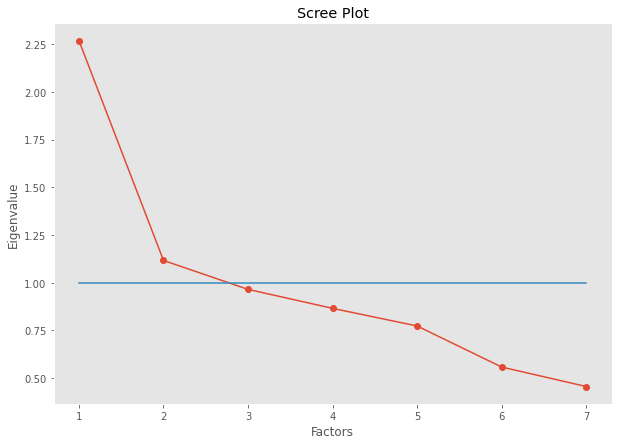

In [82]:
bank=ret_data[["BIAT","UIB","BH","BNA","AMEN BANK","UBCI","ATB"]]
faBank = FactorAnalyzer(10,rotation='Varimax')
faBank.fit(bank)
ev,v= faBank.get_eigenvalues()
plt.figure(figsize=(10,7))
plt.plot(range(1,bank.shape[1]+1),ev,'-o')
plt.plot(range(1,bank.shape[1]+1),ev/ev) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [83]:
pd.DataFrame(index=['SS Loadings','Proportion Var','Cumulative Var'],columns=["F "+str(i) for i in range(1,8)],data=faBank.get_factor_variance())

,F 1,F 2,F 3,F 4,F 5,F 6,F 7
SS Loadings,1.157641,0.427341,0.383329,0.305527,0.223426,0.115618,0.000000
Proportion Var,0.165377,0.061049,0.054761,0.043647,0.031918,0.016517,0.000000
Cumulative Var,0.165377,0.226426,0.281187,0.324834,0.356752,0.373269,0.373269


#### We only need two factors ( eigen value > 1)  for banking sector ( these two factors only explain 37.3% of total variance ) 
#### Which means that the next returns for banks can be explained with only 2 underlying factors.

In [84]:
fa = FactorAnalyzer(2,rotation='Varimax')
fa.fit(bank)
loadings=pd.DataFrame(index=bank.columns,columns=["Factor 1","Factor 2"],data=fa.loadings_)
loadings.sort_values(by='Factor 1',ascending=False)

,Factor 1,Factor 2
company,,
UIB,0.728949,0.134742
BIAT,0.705429,0.020612
BH,0.650183,-0.009151
BNA,0.315576,0.202774
AMEN BANK,0.261527,0.323628
ATB,0.166697,0.073255
UBCI,-0.031032,0.479522


### According to the first factor we have high loadings for most of the banks, only UBCI has a very small loading. UIB, BIAT, BH are the dominant banks 

## 3.4 Comparaison between banks and pharmaceuticals 

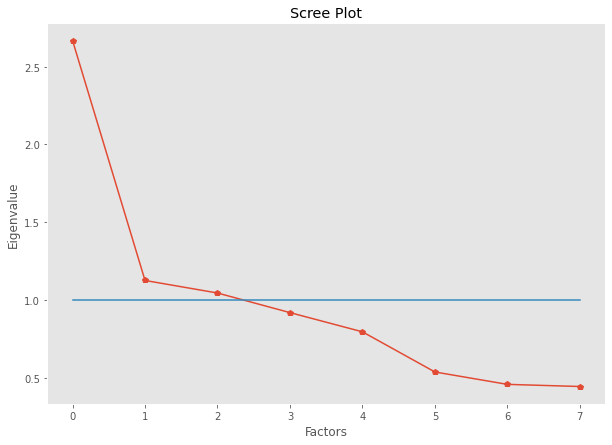

In [85]:
faPharma=FactorAnalyzer(10,rotation='Varimax')
faPharma.fit(retBankPharma)
eigenValue,val= faPharma.get_eigenvalues()
plt.figure(figsize=(10,7))
plt.plot(range(retBankPharma.shape[1]),eigenValue,'-p')
plt.plot(range(retBankPharma.shape[1]),[1 for i in range(retBankPharma.shape[1])]) 
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [86]:
pd.DataFrame(index=['SS Loadings','Proportion Var','Cumulative Var'],columns=["F "+str(i) for i in range(1,9)],data=faPharma.get_factor_variance())

,F 1,F 2,F 3,F 4,F 5,F 6,F 7,F 8
SS Loadings,1.691301,0.500289,0.466643,0.282881,0.171352,0.067439,0.024205,0.000000
Proportion Var,0.211413,0.062536,0.058330,0.035360,0.021419,0.008430,0.003026,0.000000
Cumulative Var,0.211413,0.273949,0.332279,0.367639,0.389058,0.397488,0.400514,0.400514


### We only need three factors ( eigenValue >1 ) ( these two factors only explain 40% of total variance )  

In [87]:
faPharma = FactorAnalyzer(3,rotation='Varimax')
faPharma.fit(retBankPharma)
loadings=pd.DataFrame(index=retBankPharma.columns,columns=["Factor 1","Factor 2","Factor 3"],data=faPharma.loadings_)
F1=loadings.sort_values(by='Factor 1',ascending=False).head(10)['Factor 1']
F2=loadings.sort_values(by='Factor 2',ascending=False).head(10)['Factor 2']
F3=loadings.sort_values(by='Factor 3',ascending=False).head(10)['Factor 3']
dic={'Factor 1':F1.index,'Factor 1 Values': np.asanyarray(F1),'Factor 2':F2.index,'Factor 2 Values':np.asanyarray(F2),'Factor 3':F3.index,'Factor 3 Values':np.asanyarray(F3)}
pd.DataFrame(dic)

,Factor 1,Factor 1 Values,Factor 2,Factor 2 Values,Factor 3,Factor 3 Values
0,BIAT,0.733972,ADWYA,0.980396,UIB,0.348085
1,ATTIJARI BANK,0.721124,BIAT,0.089460,AMEN BANK,0.284781
2,UIB,0.706964,ATTIJARI BANK,0.074042,SIPHAT,0.234369
3,BH,0.657439,SIPHAT,0.046530,UNIMED,0.166291
4,AMEN BANK,0.230914,UIB,0.023944,ATTIJARI BANK,0.079327
5,ADWYA,0.182503,BH,-0.030334,ADWYA,0.031432
6,UNIMED,0.078711,AMEN BANK,-0.038298,BH,-0.014649
7,SIPHAT,-0.056345,UNIMED,-0.119147,BIAT,-0.025742


### The first factor is clearly dominated by banks ( All banks except AMEN BANK have a have value while the pharmaceuticals have low values ) while the second factor is dominated by a pharmaceutical (ADWYA has a very high value 0.98 while the other two companies  UNIMED and SIPHAT have very low values , this might indicate that these two companies have different returns pattern from ADWYA ) 

## 3.5 Comparaison between banks and telecom 

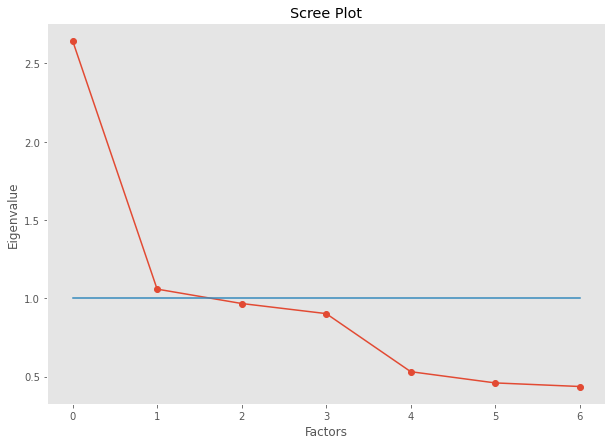

In [89]:
faTelecom = FactorAnalyzer(rotation='Varimax')
faTelecom.fit(retBankTelecom)
eigenValue,v= faTelecom.get_eigenvalues()
plt.figure(figsize=(10,7))
plt.plot(range(retBankTelecom.shape[1]),eigenValue,'-o')
plt.plot(range(retBankTelecom.shape[1]),[1 for i in range(retBankTelecom.shape[1])])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [160]:
faTelecom = FactorAnalyzer(2,rotation='Varimax')
faTelecom.fit(retBankTelecom)
loadings=pd.DataFrame(index=retBankTelecom.columns,columns=["Factor 1","Factor 2"],data=faTelecom.loadings_)
F1=loadings.sort_values(by='Factor 1',ascending=False).head(10)['Factor 1']
F2=loadings.sort_values(by='Factor 2',ascending=False).head(10)['Factor 2']
dic={'Factor 1':F1.index,'Factor 1 Values': np.asanyarray(F1),'Factor 2':F2.index,'Factor 2 Values':np.asanyarray(F2)}
pd.DataFrame(dic)

,Factor 1,Factor 1 Values,Factor 2,Factor 2 Values
0,ATTIJARI BANK,0.727972,SOTETEL,0.989234
1,UIB,0.727239,UIB,0.135229
2,BIAT,0.715332,ATTIJARI BANK,0.090190
3,BH,0.650648,SERVICOM,0.073515
4,AMEN BANK,0.269600,BIAT,0.038147
5,SOTETEL,0.133608,AMEN BANK,-0.001485
6,SERVICOM,-0.000099,BH,-0.038506


# Part 4 : Predictive modelling

Goal : try to build a model that predicts the next day market returns (next_day_mkt_ret column in ret_data) using the techniques that we covered in class. You may want to :
1. perform an exploratory data analysis 
2. use linear models with polynomial / interactions transformations along with cross validation

Please add as many cells as necessary below to answer this question.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
# now let's define the next day market returns
ret_data['next_day_mkt_ret'] = ret_data.mean(1).shift(-1)

In [11]:
ret_data.describe()

company,ADWYA,AETECH,AIR LIQUDE TSIE,ALKIMIA,AMEN BANK,AMI DA 1/4 110817,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,...,TPR,TUNINVEST-SICAR,TUNIS RE,TUNISAIR,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK,next_day_mkt_ret
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,246.000000
mean,-0.046803,-0.124082,-0.004317,-0.010230,0.064731,380.154850,0.009566,0.020627,-0.151769,-0.062505,...,0.133229,0.003399,-0.015068,0.268457,-0.068469,-0.021984,0.039273,0.032833,-0.008187,4.557265
std,1.149649,2.254722,1.391540,1.476494,1.023608,2262.652164,2.299358,1.075320,2.534434,1.582153,...,1.195447,1.723251,1.072123,2.339807,2.410720,1.314165,1.440541,1.438274,0.959704,26.947896
min,-4.132231,-5.952381,-7.330643,-4.497878,-3.000000,-99.421965,-5.660377,-7.464789,-5.703422,-3.746398,...,-3.235294,-7.142857,-3.799020,-5.747126,-6.930693,-5.875952,-6.080000,-3.000000,-2.968961,-1.737973
25%,-0.678581,-1.670844,0.000000,0.000000,-0.362319,-2.300066,-2.030509,-0.363474,-2.080666,-1.052632,...,-0.434783,0.000000,-0.361882,-1.626124,-1.827876,0.000000,-0.661202,-0.602790,-0.144196,-0.149656
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067805
75%,0.513305,1.526807,0.000000,0.000000,0.372451,1.906709,1.785714,0.477330,1.270434,0.737550,...,0.597761,0.000000,0.244499,1.818182,1.332328,0.000000,0.744202,0.424191,0.000000,0.240732
max,3.738318,5.479452,5.455680,6.079370,3.000000,16200.000000,5.769231,4.084507,6.081081,6.064516,...,5.232558,6.000000,3.660131,6.000000,6.060606,4.500000,5.246721,4.389087,6.000000,192.724213


## 4.1 Understanding  the market return

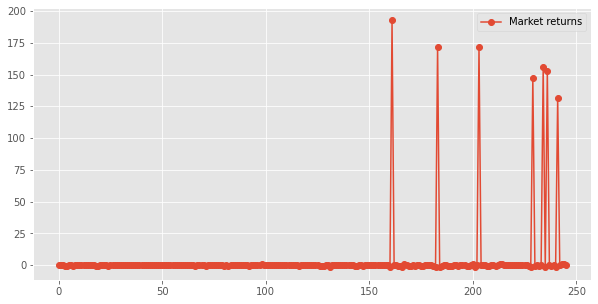

In [12]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(len(ret_data['next_day_mkt_ret'] ))],ret_data['next_day_mkt_ret'],'-o',label="Market returns" )
plt.legend(loc='best')

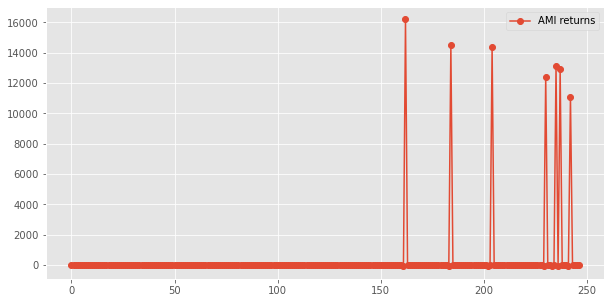

In [13]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(len(ret_data['next_day_mkt_ret'] ))], ret_data['AMI DA 1/4 110817'],'-o',label="AMI returns")
plt.legend(loc='best')

#### We can see that the market returns take high values in 7 days that can be explained by the return of only one company : AMI, these values might be problematic when dealing with the linear models.
#### Therefore I'm going to drop the days when the returns are very large

## 4.2 Dropping the outliers and cleaning the data

In [17]:
ret_data.drop('next_day_mkt_ret',axis=1)
ret_data['next_day_mkt_ret'] = ret_data.mean(1)
ret_data=ret_data.drop(ret_data[ret_data.next_day_mkt_ret >1000].index,axis=0)
ret_data['next_day_mkt_ret']=ret_data['next_day_mkt_ret'].shift(-1)

In [18]:
#Dropping the last line because we don't have the target feature in that day
ret_data.drop(ret_data.index[-1], axis=0, inplace=True)

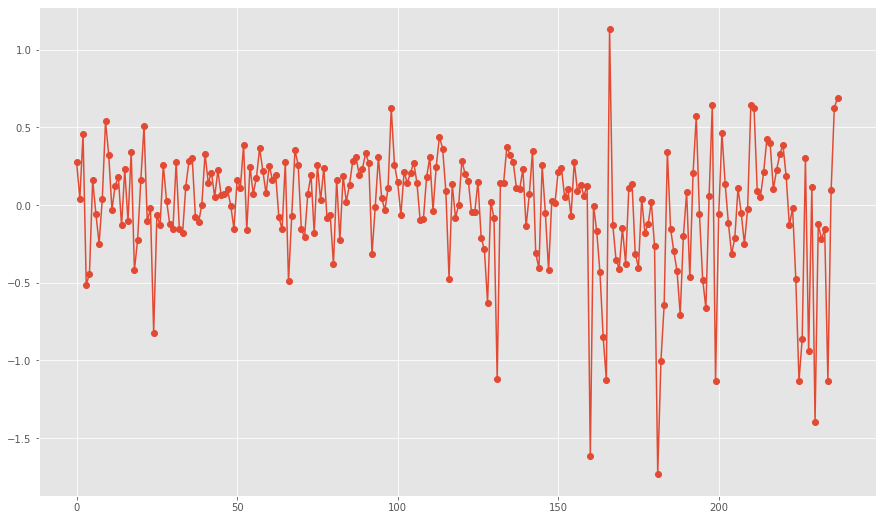

In [19]:
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(ret_data['next_day_mkt_ret'] ))],ret_data['next_day_mkt_ret'],'-o',label="Market returns" )

#### The market returns now has their values between [-2,2] , we have high fluctuation 

## 4.3 Defining our model

### 4.3.1 Defining the pipeline and the dependant and independant variables

In [21]:
#Defining our pipline for Polynomial regression
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))
#Defining our variables
X=ret_data.drop(['next_day_mkt_ret'],axis=1)
#Defining our target variable
Y=ret_data['next_day_mkt_ret']

### 4.3.1 Splitting our data into testing and training data 

In [23]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,random_state=1,train_size=0.8)
y_test=np.asanyarray(ytest)

#### I'm splitting the data into : 80% training and 20% testing

### 4.3.2 Multiple linear regression model 

In [102]:
y_Linear=PolynomialRegression(1).fit(Xtrain,ytrain).predict(Xtest)

Root Mean Squared error =  0.44593387632500475


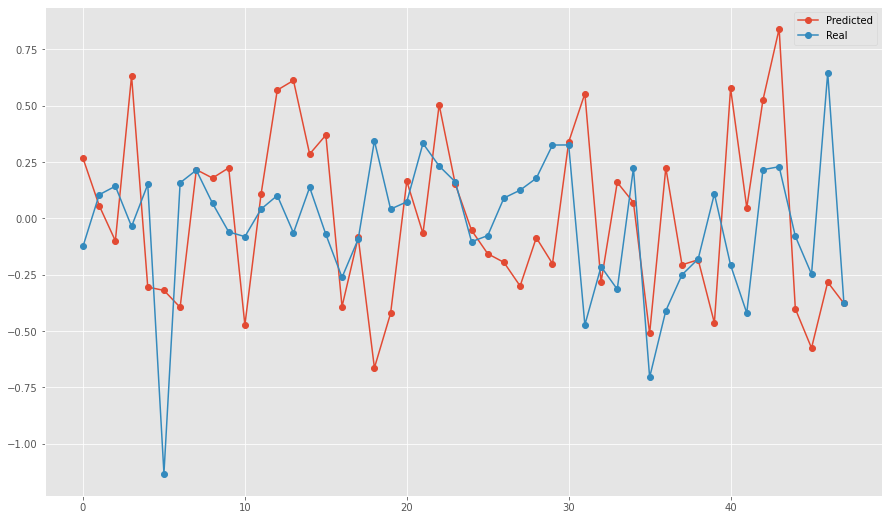

In [103]:
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(y_Linear))],y_Linear,'-o',label="Predicted")
plt.plot([i for i in range(len(y_test))],y_test,'-o',label="Real")
plt.legend(loc='best')
print("Root Mean Squared error = ",mean_squared_error(y_Linear, ytest,squared=False))

#### The linear model has a root mean squared error (RMSE) = 0.44. We can see that our model doesn't give a good prediction, we can try to make the model more complex to better fit the data 

### 4.3.3 Polynomial Regression ( Degree = 2 )

Root Mean Squared error =  0.28581340557640256


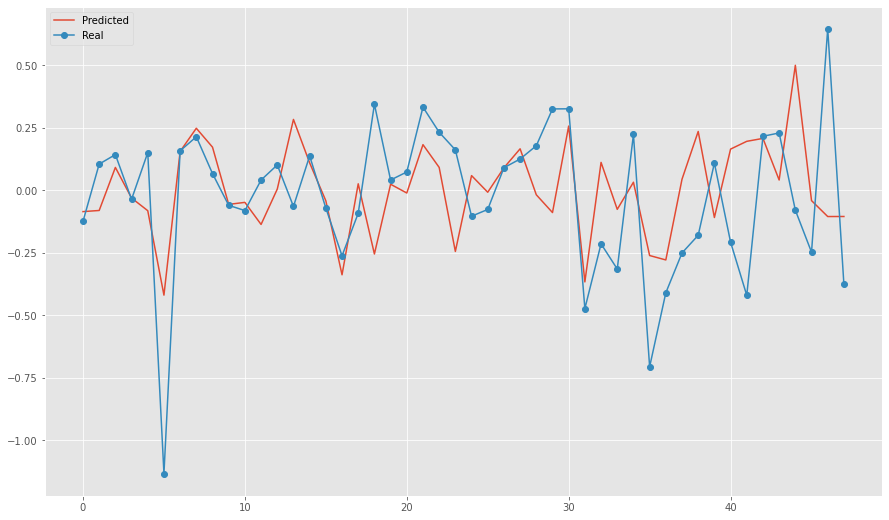

In [104]:
y_Poly2=PolynomialRegression(2).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(y_Poly2))],y_Poly2,'-',label="Predicted")
plt.plot([i for i in range(len(y_Poly2))],y_test,'-o',label="Real")
plt.legend(loc='best')
print("Root Mean Squared error = ",mean_squared_error(y_Poly2, ytest,squared=False))

#### The second degree polynomail regression gives an RMSE = 0.286. This is clearly better than the first model with less errors and better fit to the data

### 4.3.4 Polynomial Regression ( Degree = 3 )

Root Mean Squared error =  0.30432539706840767


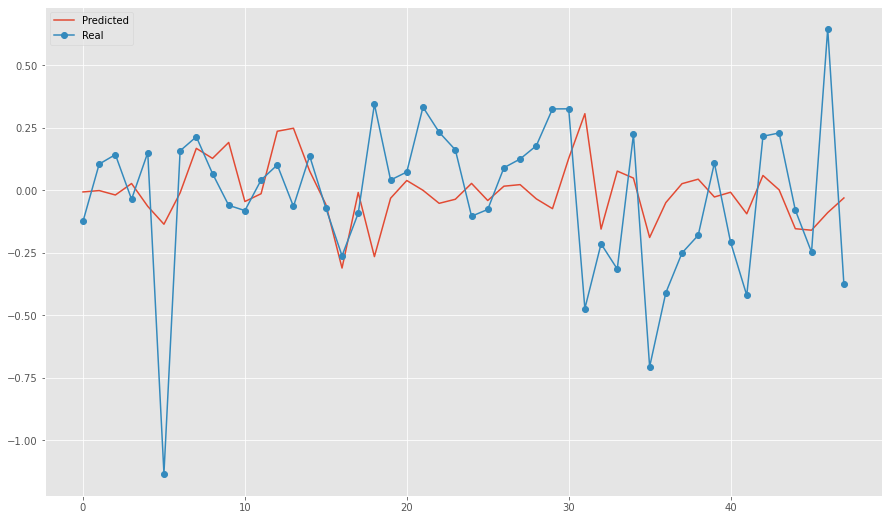

In [105]:
y_Poly3=PolynomialRegression(3).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(y_Poly3))],y_Poly3,'-',label="Predicted")
plt.plot([i for i in range(len(y_Poly3))],y_test,'-o',label="Real")
plt.legend(loc='best')
print("Root Mean Squared error = ",mean_squared_error(y_Poly3, ytest,squared=False))

#### The third degree polynomial model has an RMSE = 0.304. This is worse than the previous model , we have a higher variance here

### 4.3.5 Polynomial Regression ( Degree = 4 )

Root Mean Squared error =  0.2877792289747961


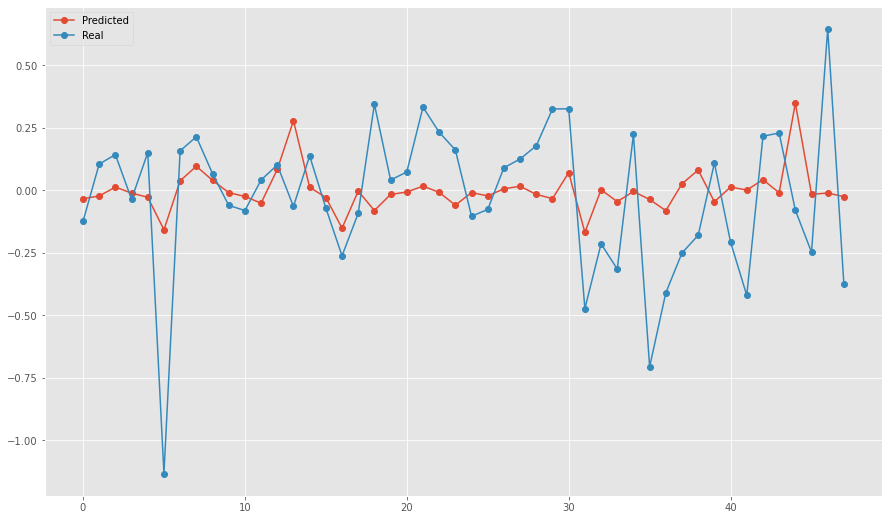

In [24]:
y_Poly4=PolynomialRegression(4).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(15,9))
plt.plot([i for i in range(len(y_Poly4))],y_Poly4,'-o',label="Predicted")
plt.plot([i for i in range(len(y_Poly4))],y_test,'-o',label="Real")
plt.legend(loc='best')
print("Root Mean Squared error = ",mean_squared_error(y_Poly4, ytest,squared=False))

#### While this four degree polynomial has an RMSE = 0.288 which is better than the third degree model is it still worse than the second degree polynomial.

## 4.4 Applying Cross Validation to select the best model 

#### We're going to use a 7 folds cross validation on three polynomial models ( degree 1, 2 and 3 / degree 4 takes too long to run on my CPU and RAM)

In [67]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
degree=np.arange(1,4)
train_score,val_score = validation_curve(PolynomialRegression(),X,Y,'polynomialfeatures__degree',degree,cv=7)

Text(0.5, 1.0, 'Validation Curve')

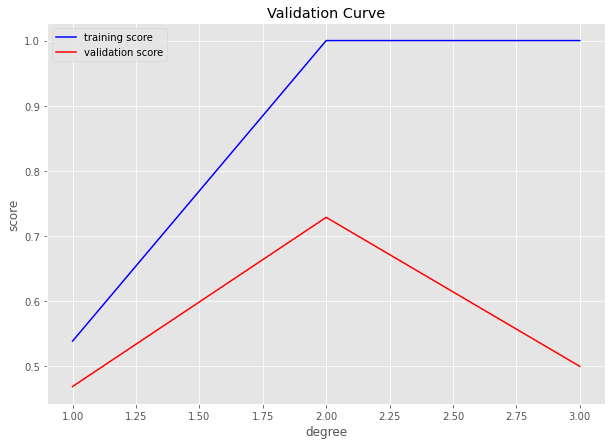

In [70]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(-val_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score');
plt.title('Validation Curve')

#### We can confirm from our cross validation curve the previous results showing that the best regression model is when we use a second degree Polynomial model 

## 4.5 Second model : using only companies that are correlated with the target feature

In [25]:
correlated=set()
for i in X.columns:
    correlation = X[i].corr(Y)
    if correlation >0.1 or correlation<-0.1 :
        correlated.add(i)
print(len(correlated))
print(correlated)

19
{'ASS MULTI ITTIHAD', 'SERVICOM', 'SOTRAPIL', 'SANIMED', 'CIMENTS DE BIZERTE', 'OFFICEPLAST', 'GIF-FILTER', 'ELECTROSTAR', 'SOTETEL', 'SITS', 'CIL', 'MAGHREB INTERN PUB', 'ADWYA', 'PLAC. TSIE-SICAF', 'MONOPRIX', 'BEST LEASE', 'ARTES', 'DELICE HOLDING', 'BTE (ADP)'}


Root Mean Squared error =  0.36632265166627487


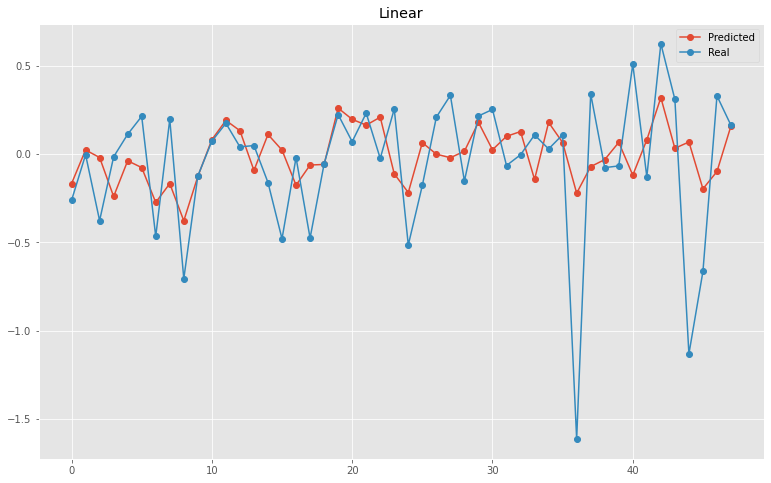

In [27]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X[np.asanyarray(correlated)],Y,random_state=5,train_size=0.8)
y_test=np.asanyarray(ytest)
plt.figure(figsize=(13,8))
y_Linear=PolynomialRegression(1).fit(Xtrain,ytrain).predict(Xtest)
plt.plot([i for i in range(len(y_Linear))],y_Linear,'-o',label="Predicted")
plt.plot([i for i in range(len(y_Linear))],y_test,'-o',label="Real")
plt.legend(loc='best')
plt.title("Linear")
print("Root Mean Squared error = ",mean_squared_error(y_Linear, ytest,squared=False))

Root Mean Squared error =  5.397679134339426


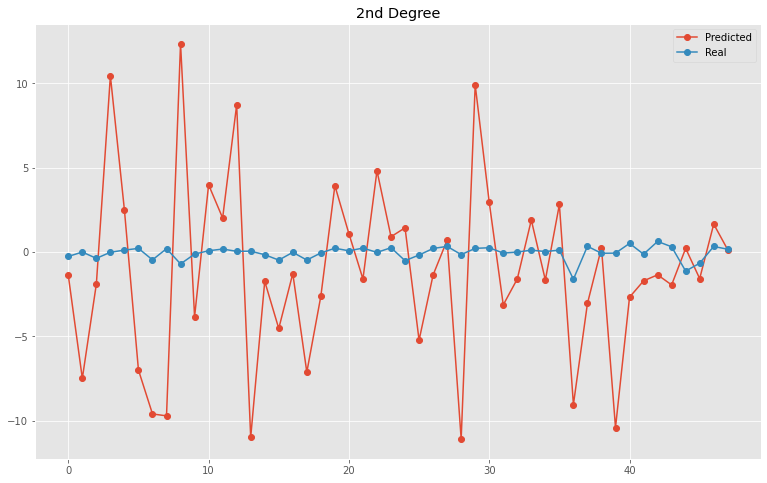

In [28]:
y_Poly2=PolynomialRegression(2).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(13,8))
plt.plot([i for i in range(len(y_Poly2))],y_Poly2,'-o',label="Predicted")
plt.plot([i for i in range(len(y_Poly2))],y_test,'-o',label="Real")
plt.title("2nd Degree")
plt.legend(loc='best')
print("Root Mean Squared error = ",mean_squared_error(y_Poly2, ytest,squared=False))

Root Mean Squared error =  0.4853167504887962


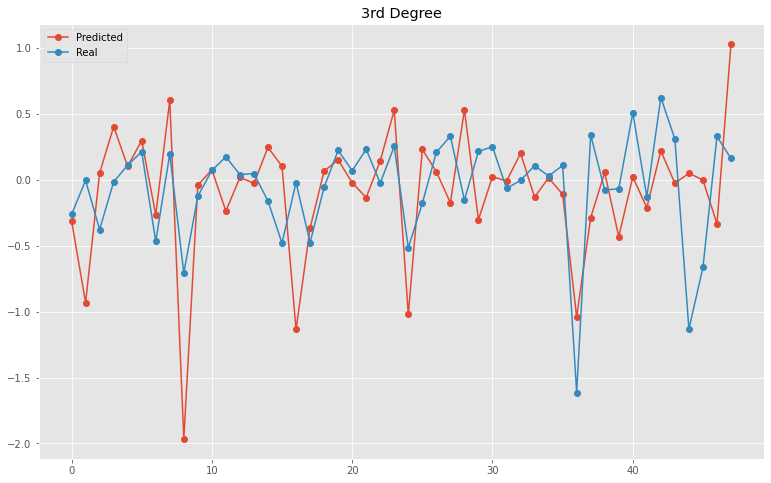

In [29]:
y_Poly3=PolynomialRegression(3).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(13,8))
plt.plot([i for i in range(len(y_Poly3))],y_Poly3,'-o',label="Predicted")
plt.plot([i for i in range(len(y_Poly3))],y_test,'-o',label="Real")
plt.legend(loc='best')
plt.title("3rd Degree")
print("Root Mean Squared error = ",mean_squared_error(y_Poly3, ytest,squared=False))

Root Mean Squared error =  1.067142671829303


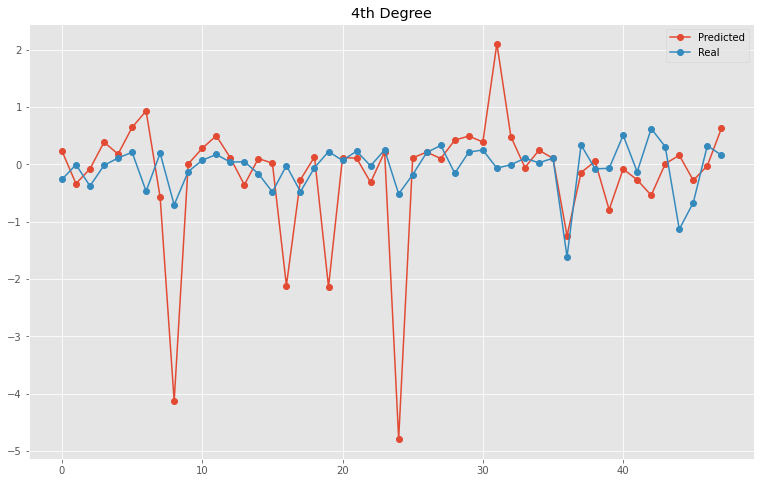

In [30]:
y_Poly4=PolynomialRegression(4).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(13,8))
plt.plot([i for i in range(len(y_Poly4))],y_Poly4,'-o',label="Predicted")
plt.plot([i for i in range(len(y_Poly4))],y_test,'-o',label="Real")
plt.legend(loc='best')
plt.title("4th Degree")
print("Root Mean Squared error = ",mean_squared_error(y_Poly4, ytest,squared=False))

Root Mean Squared error =  1.6638162494026913


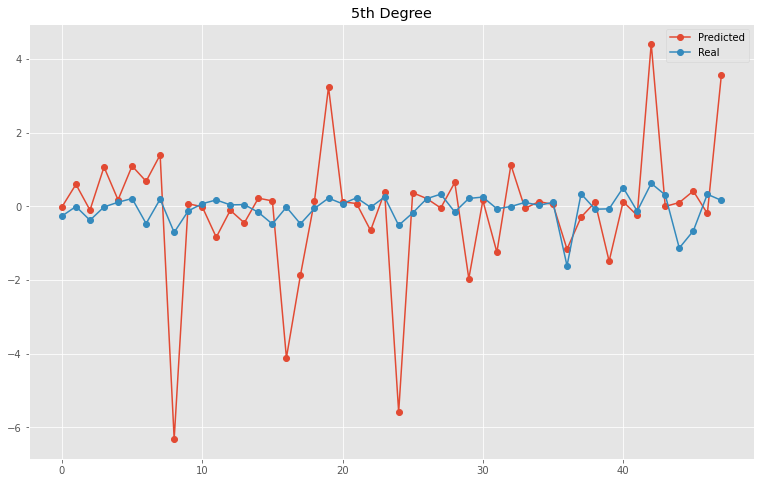

In [31]:
y_Poly5=PolynomialRegression(5).fit(Xtrain,ytrain).predict(Xtest)
plt.figure(figsize=(13,8))
plt.plot([i for i in range(len(y_Poly5))],y_Poly5,'-o',label="Predicted")
plt.plot([i for i in range(len(y_Poly5))],y_test,'-o',label="Real")
plt.legend(loc='best')
plt.title("5th Degree")
print("Root Mean Squared error = ",mean_squared_error(y_Poly5, ytest,squared=False))

#### Judging by the RMSE of these models ( Linear : 0.38 , 2nd degree : 5.38, 3rd degree : 0.48 ) using the full return data gives us a better model 